# Personal Loan Campaign Modelling project

# 1. Introduction

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).AllLife bank wants to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

 In this notebook, I am using both logistic and decision tree models to predict whether a customer will buy a loan or not. The dataset contains various independent variables such as `Age`, `Income`, `Experience`, `Family` etc. that are being analyzed. The data was trained by these two models and evaluated with different improvement strategies for accuracy 

## Objective:

**The dataset aims to answer the following key questions:**

* Identify different factors that influence the customer to buy loan.
* Build a prediction model that help the bank in targeting right segment of customers to expand the loan business


## Data Dictionary:
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

# 2. Loading libraries

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


# Removes the limit from the number of displayed columns and rows.
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# for statistical analysis 
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve, f1_score
from sklearn.model_selection import GridSearchCV

# For pandas profiling
#from pandas_profiling import ProfileReport

# 3. Loading and exploring the data
In this section the goal is to load the data into dataframe and check its basic properties. This will include the dimension, column types and names, and missingness counts.

In [97]:
bankloan = pd.read_csv('Loan_Modelling.csv')
df = bankloan.copy() # copying to a another dataframe to keep the original dataframe intact to refer back

In [98]:
df.head()

ID  Age  Experience  Income  ZIPCode  Family   CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4 1.60000          1         0   
1   2   45          19      34    90089       3 1.50000          1         0   
2   3   39          15      11    94720       1 1.00000          1         0   
3   4   35           9     100    94112       1 2.70000          2         0   
4   5   35           8      45    91330       4 1.00000          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [99]:
df.tail()

ID  Age  Experience  Income  ZIPCode  Family   CCAvg  Education  \
4995  4996   29           3      40    92697       1 1.90000          3   
4996  4997   30           4      15    92037       4 0.40000          1   
4997  4998   63          39      24    93023       2 0.30000          3   
4998  4999   65          40      49    90034       3 0.50000          2   
4999  5000   28           4      83    92612       3 0.80000          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

The column `Personal_Loan` is the target variable for prediction and rest of the columns are independent variables. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan).From the random 5 head and tail rows, there are no major issues with missing values. Some of the variables have names with "_" which can be standardized.

In [100]:
# Removing "_" in column names to keep is consistent
df.columns =[col.replace('_','') for col in df.columns]

In [101]:
df.shape

(5000, 14)

Dataset contains 5000 rows of customers information

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   int64  
 4   ZIPCode            5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


All the columns are of numeric type

In [103]:
pd.DataFrame(
    data={
        "% of Missing Values": round(df.isna().sum() / df.isna().count() * 100, 2)
    }
)

% of Missing Values
ID                             0.00000
Age                            0.00000
Experience                     0.00000
Income                         0.00000
ZIPCode                        0.00000
Family                         0.00000
CCAvg                          0.00000
Education                      0.00000
Mortgage                       0.00000
PersonalLoan                   0.00000
SecuritiesAccount              0.00000
CDAccount                      0.00000
Online                         0.00000
CreditCard                     0.00000

It appears that there are no null values or missing rows in any of the columns. Most of the columns are of int or float type. we will look at the data type conversion if needed at later stage.

In [104]:
df.apply(lambda x: len(x.unique()))

ID                   5000
Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
PersonalLoan            2
SecuritiesAccount       2
CDAccount               2
Online                  2
CreditCard              2
dtype: int64

The `ID` column does not add any interesting information. There is no association between customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can ignore this column for our model prediction. There are 5 rows having binary values. We need to analyze if any of the other columns have `"0"` values that need to be treated

In [105]:
# Making a list of all binary variables
bin_col = [
    "PersonalLoan",
    "SecuritiesAccount",
    "CDAccount",
    "Online",
    "CreditCard",
]

# Printing number of count of each unique value in each column
for column in bin_col:
    print(column)
    print(df[column].value_counts())
    print("-" * 50)

PersonalLoan
0    4520
1     480
Name: PersonalLoan, dtype: int64
--------------------------------------------------
SecuritiesAccount
0    4478
1     522
Name: SecuritiesAccount, dtype: int64
--------------------------------------------------
CDAccount
0    4698
1     302
Name: CDAccount, dtype: int64
--------------------------------------------------
Online
1    2984
0    2016
Name: Online, dtype: int64
--------------------------------------------------
CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64
--------------------------------------------------


Data indicates a quite small percentage of asset customers.Among these 5000 customers, only 480 (= `9.6%`) accepted the personal loan that was offered to them in the earlier campaign. `10.4%` have securities account. `6.04%` have certificate of deposit. `59.6%` customers use internet banking facilities. Only  `29.4%` customers use credit card issued by any other banks. Data indicate there are lot of opportunities to expand the asset customer base.

In [106]:
non_bin_col = [
    "Age",
    "Experience",
    "Income",
    "ZIPCode",
    "Family",
    "CCAvg",
    "Education",
    "Mortgage"
]
for i in non_bin_col:
    print('Unique values in',i, 'are :')
    print(df[i].value_counts())
    print('*'*50)

Unique values in Age are :
35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64
**************************************************
Unique values in Experience are :
 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 39     85
 2     

In [107]:
# how many customers have credit card and credit card spending '0' 
filtered_df = df[(df["CCAvg"] == 0) & (df["CreditCard"] == 1)]
filtered_df['CreditCard'].value_counts()

1    28
Name: CreditCard, dtype: int64

`Personal_Loan`,`Securities_Account`,`CD_Account`,`Online`,`CreditCard`, `Age`, `Income`, `ZIPCode`, `Family`, `Education` have no data issues. `ID` column we can ignore.
* `CCAvg` have 0 values for 106 customers. Out of which only 28 customers use credit card issued by other banks. It's possible that they have the credit card but have not used it. Moreover, there are no -ve values, so imputation is not necessary
* There are 52 customers with negative(-ve) values in `Experience`. This could be a data input error as in general it is not possible to measure negative years of experience. They are in the age group between 23 and 29. We can either delete these rows or treat them. This needs further analysis.
* There are 3462 customers having  `"0"` values in `Mortgage` or does not have a mortgage. We don't have additional data points to know if they already own a house or not. But certainly these are the customers to target for asset customer base. 

# 4. Data Exploratory Analysis

In [108]:
df.describe(include='all').T

count        mean        std         min         25%  \
ID                5000.00000  2500.50000 1443.52000     1.00000  1250.75000   
Age               5000.00000    45.33840   11.46317    23.00000    35.00000   
Experience        5000.00000    20.10460   11.46795    -3.00000    10.00000   
Income            5000.00000    73.77420   46.03373     8.00000    39.00000   
ZIPCode           5000.00000 93169.25700 1759.45509 90005.00000 91911.00000   
Family            5000.00000     2.39640    1.14766     1.00000     1.00000   
CCAvg             5000.00000     1.93794    1.74766     0.00000     0.70000   
Education         5000.00000     1.88100    0.83987     1.00000     1.00000   
Mortgage          5000.00000    56.49880  101.71380     0.00000     0.00000   
PersonalLoan      5000.00000     0.09600    0.29462     0.00000     0.00000   
SecuritiesAccount 5000.00000     0.10440    0.30581     0.00000     0.00000   
CDAccount         5000.00000     0.06040    0.23825     0.00000     0.00000   
Online            5000.00000     0.59680    0.49059     0.00000     0.00000   
CreditCard        5000.00000     0.29400    0.45564     0.00000     0.00000   

                          50%         75%         max  
ID                 2500.50000  3750.25000  5000.00000  
Age                  45.00000    55.00000    67.00000  
Experience           20.00000    30.00000    43.00000  
Income               64.00000    98.00000   224.00000  
ZIPCode           93437.00000 94608.00000 96651.00000  
Family                2.00000     3.00000     4.00000  
CCAvg                 1.50000     2.50000    10.00000  
Education             2.00000     3.00000     3.00000  
Mortgage              0.00000   101.00000   635.00000  
PersonalLoan          0.00000     0.00000     1.00000  
SecuritiesAccount     0.00000     0.00000     1.00000  
CDAccount             0.00000     0.00000     1.00000  
Online                1.00000     1.00000     1.00000  
CreditCard            0.00000     1.00000     1.00000

* Mean and Median `Age` of customers are almost equal, falling between 30 and 60 years of age.
* Mean and Median professional `Experience` is around 20 years, which suggests that most of the customers are seasoned working professionals
* Annual `Income` is between 8K and 224K, which appears to be right-skewed, meaning 75% of the customers income are below 98K
* 50% of customers are of family of 2
* Half of the customers are graduates

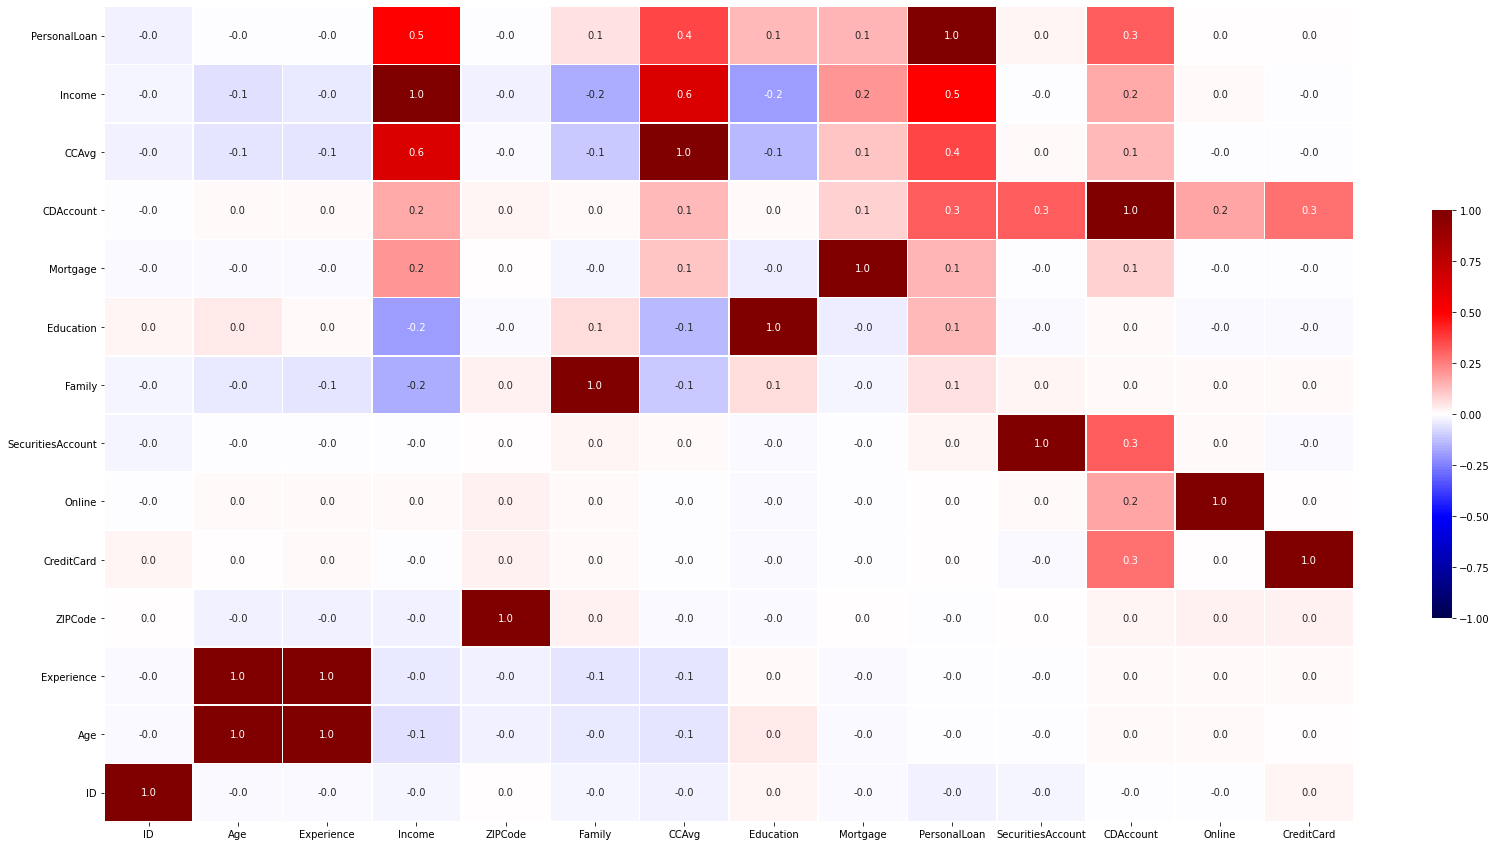

In [109]:
#numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
#numeric_columns.remove('Year') # dropping year column as it is temporal variable
corr = df.corr().sort_values(by=['PersonalLoan'],ascending=False) # sorting correlations w.r.t Price  


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(28, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            cmap='seismic', annot=True,fmt=".1f",vmin=-1, vmax=1, center= 0,
            square=False, linewidths=.7, cbar_kws={"shrink": .5});

* Personal Loan and Income have strong positive correlation, which suggests, higher the income, more willing they will be in buying loans.
* Postive correlation between credit card spending(CCAvg) and personal loan shows that Personal loan customers are also happen to be higher spendors on credit card.  
* Positive correlation between personal loan and CDaccount holders, which indicates there are liability customers taking loans as well.
* Age, experience, Zipcode, securities account have no correlation
* Family, education, mortgage have very low correlation so don't see these varibles having significant influence on customers buying loan

### 4.1 Univariate Analysis

In [110]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, color="orange"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2, color="tab:cyan"
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

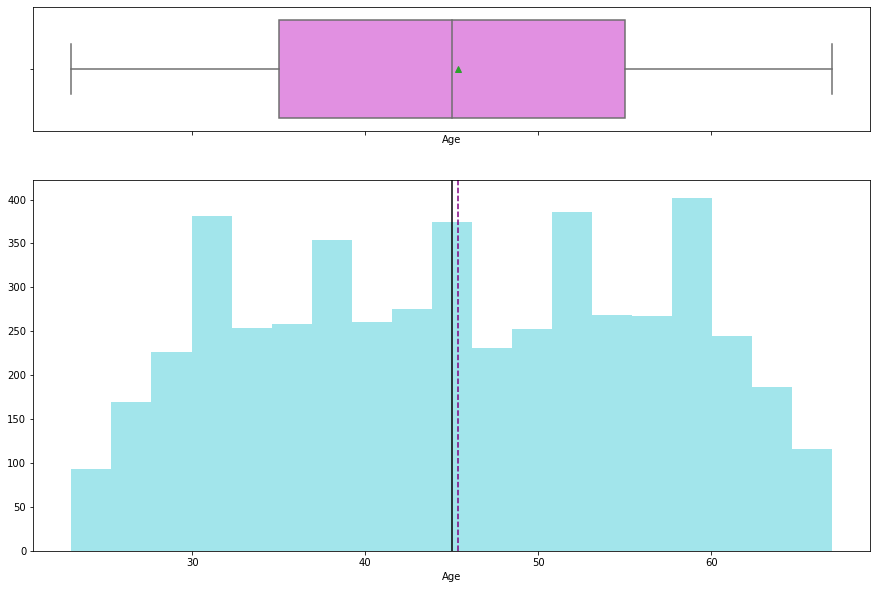

In [111]:
histogram_boxplot(df["Age"])

Age is normally distributed. Mean and Median is almost the same. There are no outliers

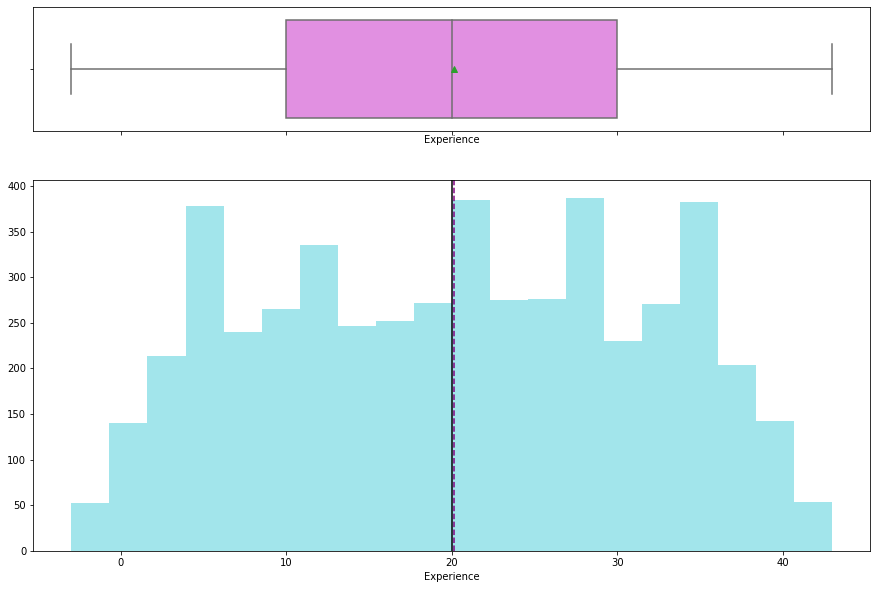

In [112]:
histogram_boxplot(df["Experience"])

`Experience` is also normally distributed and no outliers

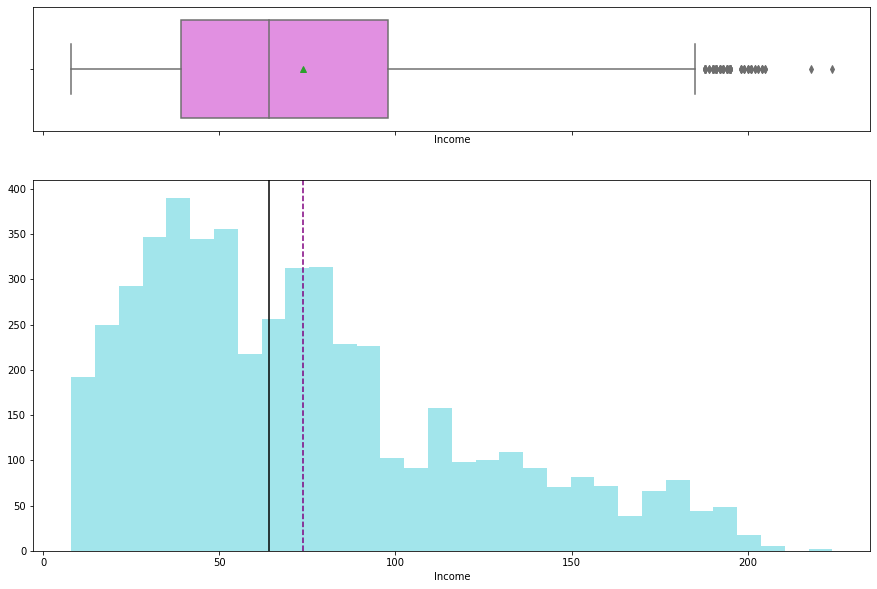

In [113]:
histogram_boxplot(df["Income"])

Income is right skewed and there is some outliers to the right

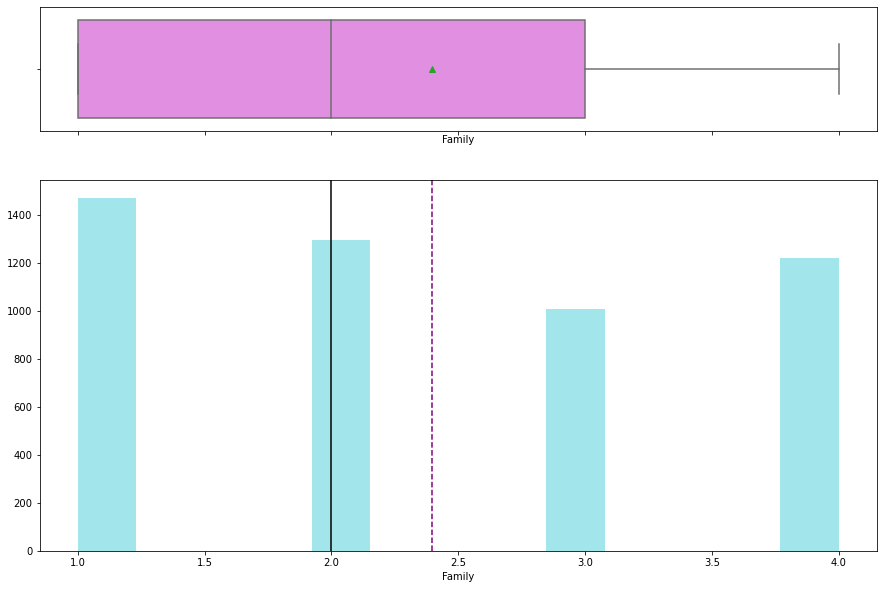

In [114]:
histogram_boxplot(df["Family"])

Distribution of Family is even 

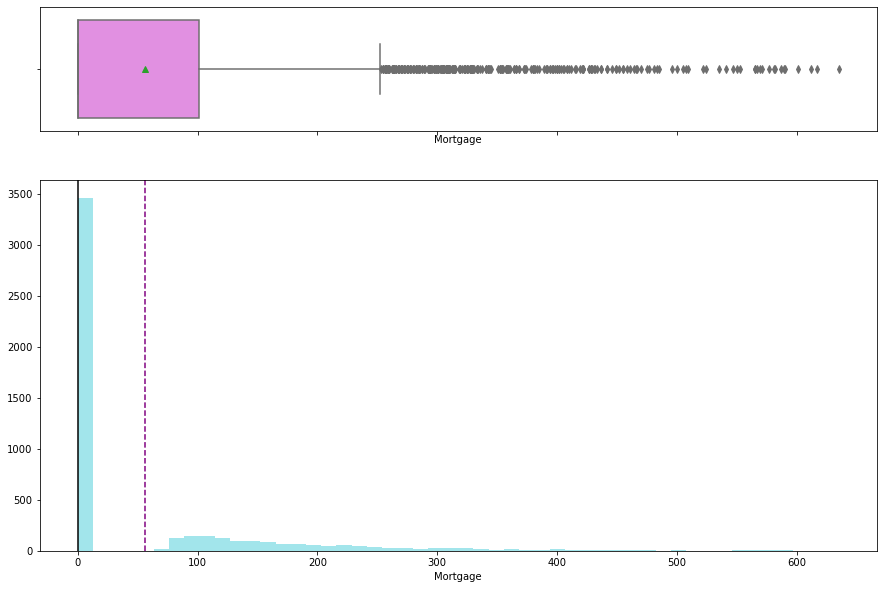

In [115]:
histogram_boxplot(df["Mortgage"])

Mortgage is right skewed and there are lot of outliers to the right

### 4.2 Bivariate Analysis

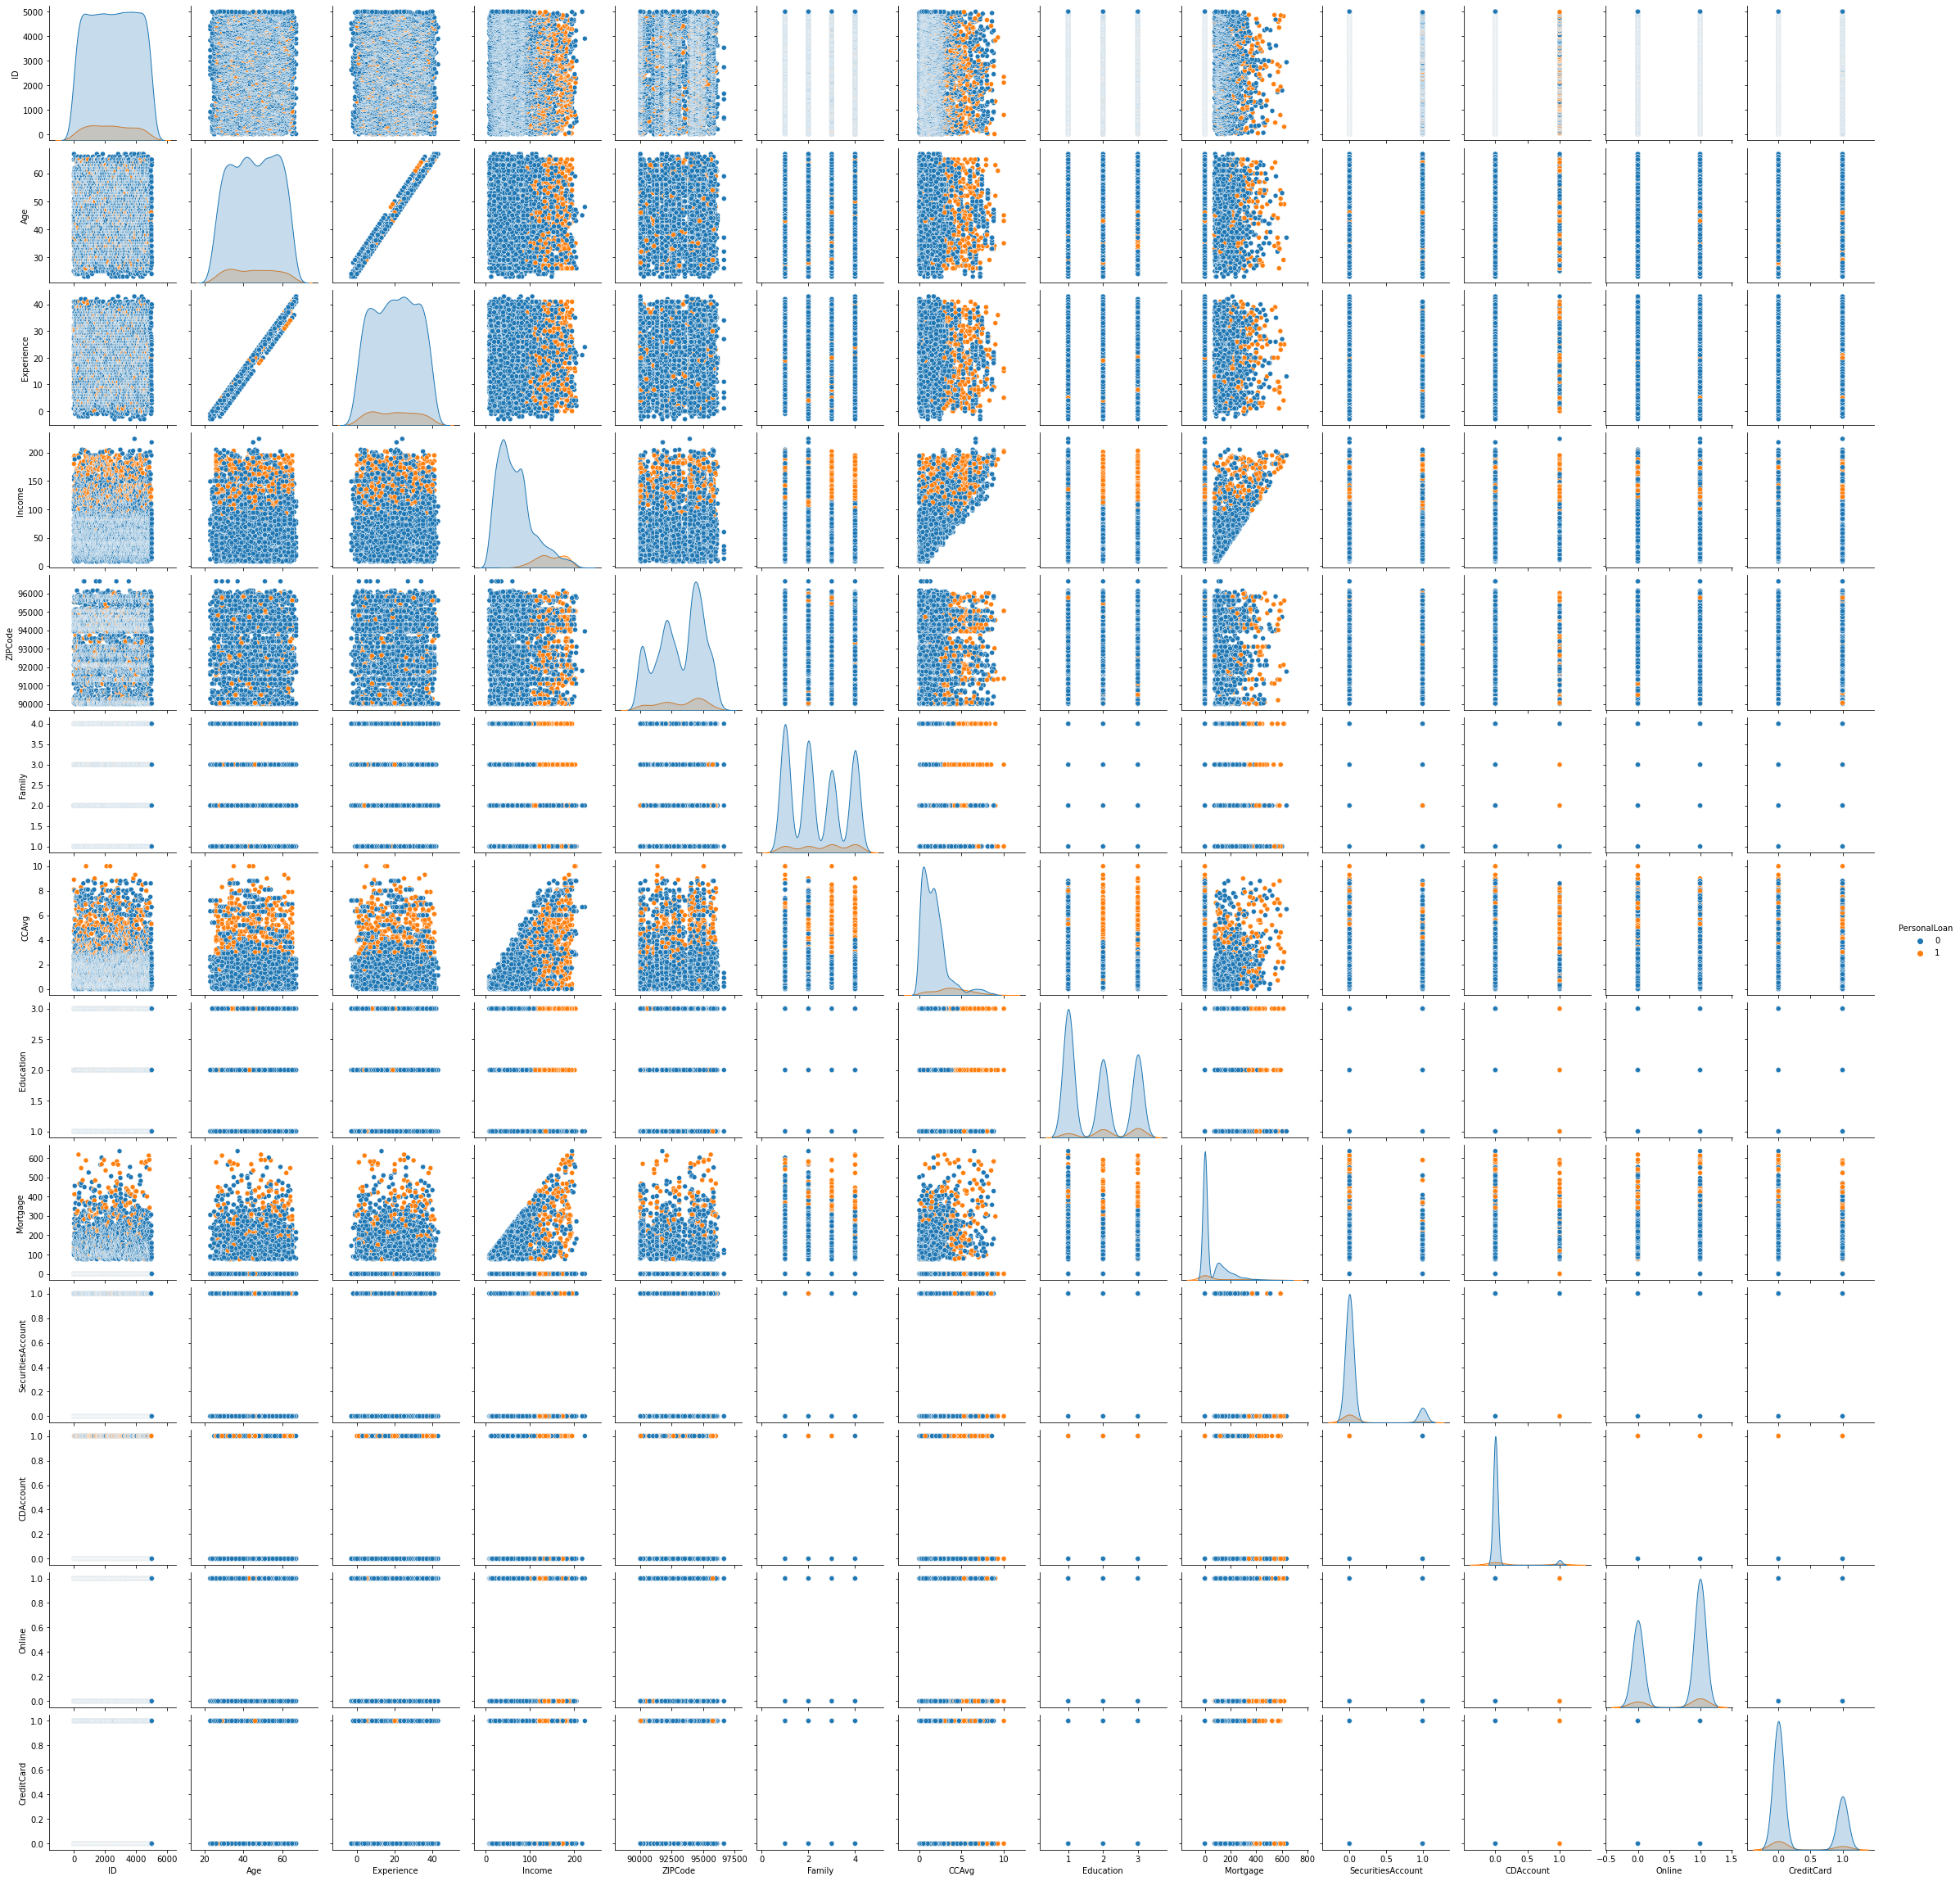

In [116]:
sns.pairplot(df, hue="PersonalLoan")
plt.show()

* `Age` is normally distributed with majority of customers falling between 30 years and 60 years of age. 
* Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. There are negative values in the Experience. This could be a data input error.
* Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median
* CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K
Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K
The variables family and education are ordinal variables. The distribution of families is evenly distributes

In [117]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,df['PersonalLoan'],margins=True)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,df['PersonalLoan'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

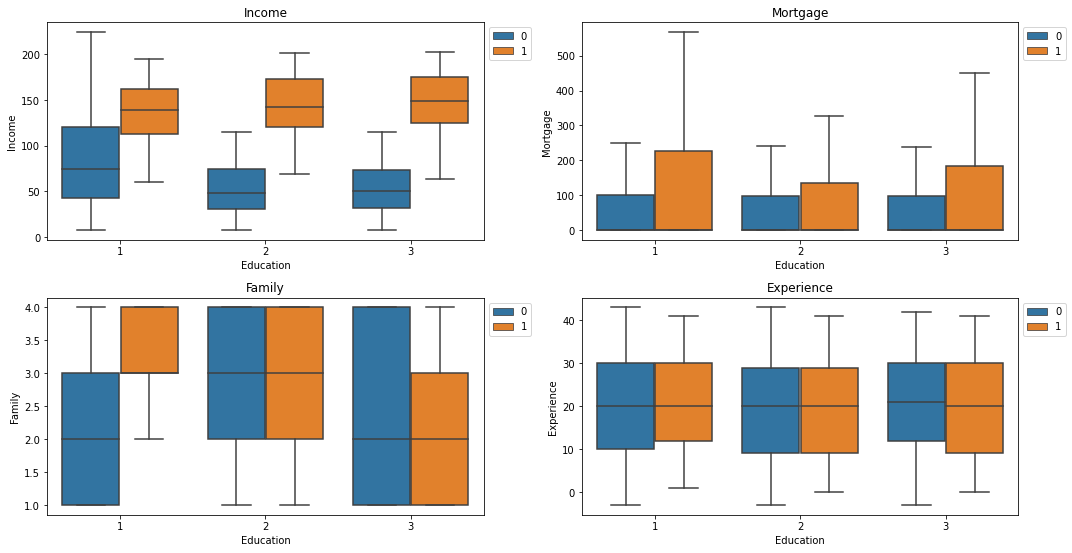

In [118]:
cols = df[['Income','Mortgage','Family', 'Experience']].columns.tolist()
plt.figure(figsize=(15,15))

for i, variable in enumerate(cols):
                     plt.subplot(4,2,i+1)
                     sns.boxplot(df["Education"],df[variable],hue=df['PersonalLoan'], showfliers=False) #turning-off outliers
                     plt.tight_layout()
                     plt.legend(loc="upper left", bbox_to_anchor=(1,1))
                     plt.title(variable)
plt.show()

* Higher eduction did not increase the income overall. But Personal loan buyers are definetely higher income earners with most of the customers earning avg annual income of 140K and above. There are few graduates who are higher income earners(avg annual income > 80K) but not personal loan buyers. It indicates that graduates and above with higher income are definely candidates for converting to asset customer.
* Mortgage customers are also personal loan buyers. There are more under graduates buying both loan and mortgage, it suggests higher risk taking category of customers.
* Interestingly under graduates with family of 3 and above and advanced professionals with median family size 2 are loan buyers. However, with graduates it does not make any differerence.
* Education and Experience are evenly distributed. Regardless of the education levels, the avg experience remains the same. In addition, Education and experience does not appear to be an influencing factor in the personal loan buying decision

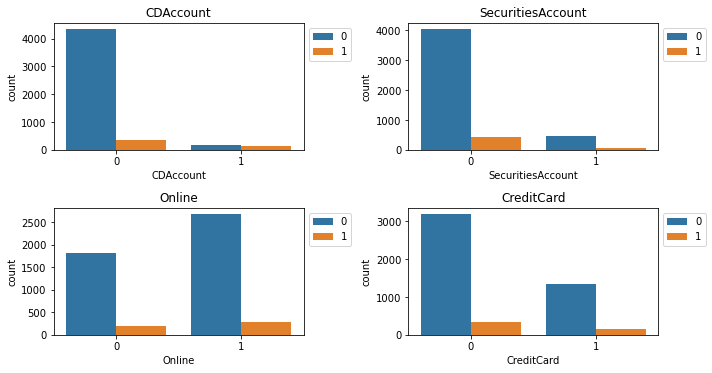

In [119]:
cols = df[['CDAccount','SecuritiesAccount','Online', 'CreditCard']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(4,2,i+1)
                     sns.countplot(df[variable],hue=df['PersonalLoan'])
                     plt.tight_layout()
                     plt.legend(loc="upper left", bbox_to_anchor=(1,1))
                     plt.title(variable)
plt.show()

* Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well
* Majority of customers who does not have loan have securities account
* There are very few credit card customers who are loan buyers. But majority of customers who does not own credit card also has not bought loan. It appears that their risk taking potential is low.
* Majority of online customers are not loan buyers

<AxesSubplot:xlabel='Family', ylabel='Income'>

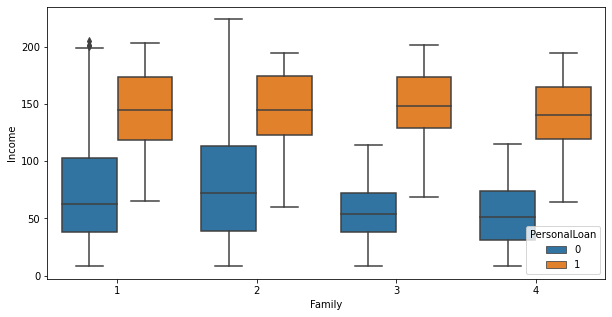

In [120]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Family",y="Income",hue="PersonalLoan", data = df)

Higher income, smaller family are the customers who will more likely take loan - family size of 2 or less with average income above 140K are loan buyers.

<AxesSubplot:xlabel='CCAvg', ylabel='Density'>

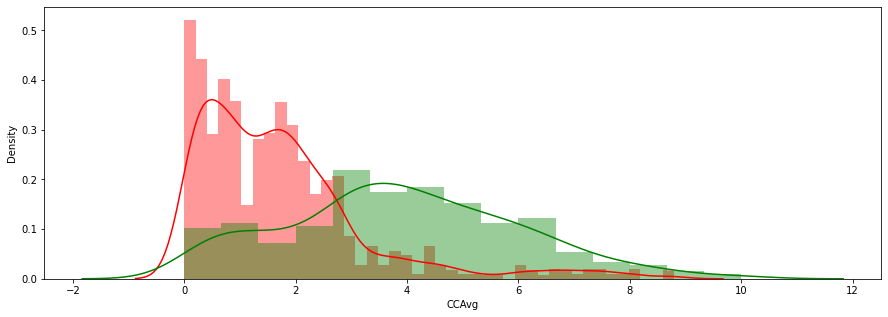

In [121]:
plt.figure(figsize=(15,5))

sns.distplot( df[df.PersonalLoan == 0]['CCAvg'], color = 'r')
sns.distplot( df[df.PersonalLoan == 1]['CCAvg'], color = 'g')

Above graph shows customers who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 is less likely to take a loan.

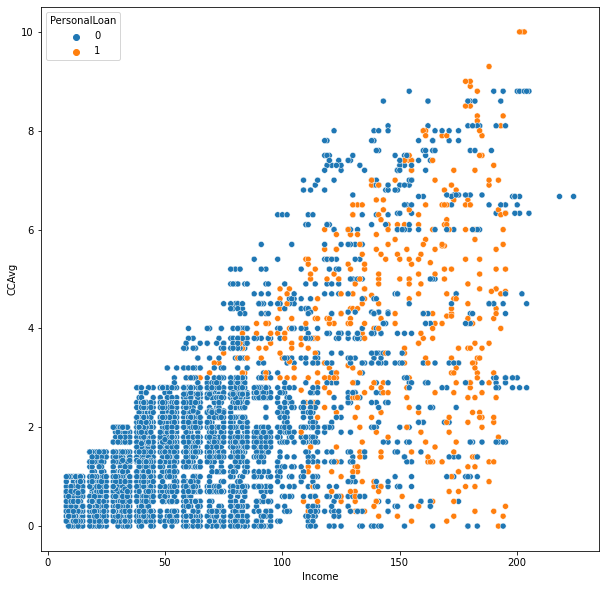

In [122]:
plt.figure(figsize=(10,10))
sns.scatterplot(y='CCAvg', x='Income', hue = 'PersonalLoan', data=df);

Majority of loan customers fall under higher income and higer CCAvg category

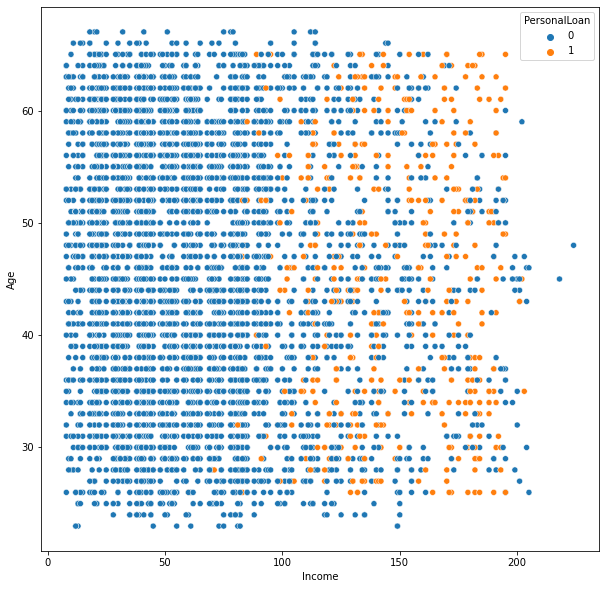

In [123]:
plt.figure(figsize=(10,10))
sns.scatterplot(y='Age', x='Income', hue = 'PersonalLoan', data=df);

Majority of loan customers are high income earners. However there is no clear pattern with respect to age.It seems evenly distributed

# 5. Data Pre-processing

### 5.1 Detecting Outliers
* Income, CCAvg and Mortgage have outliers in the data which we will treat.

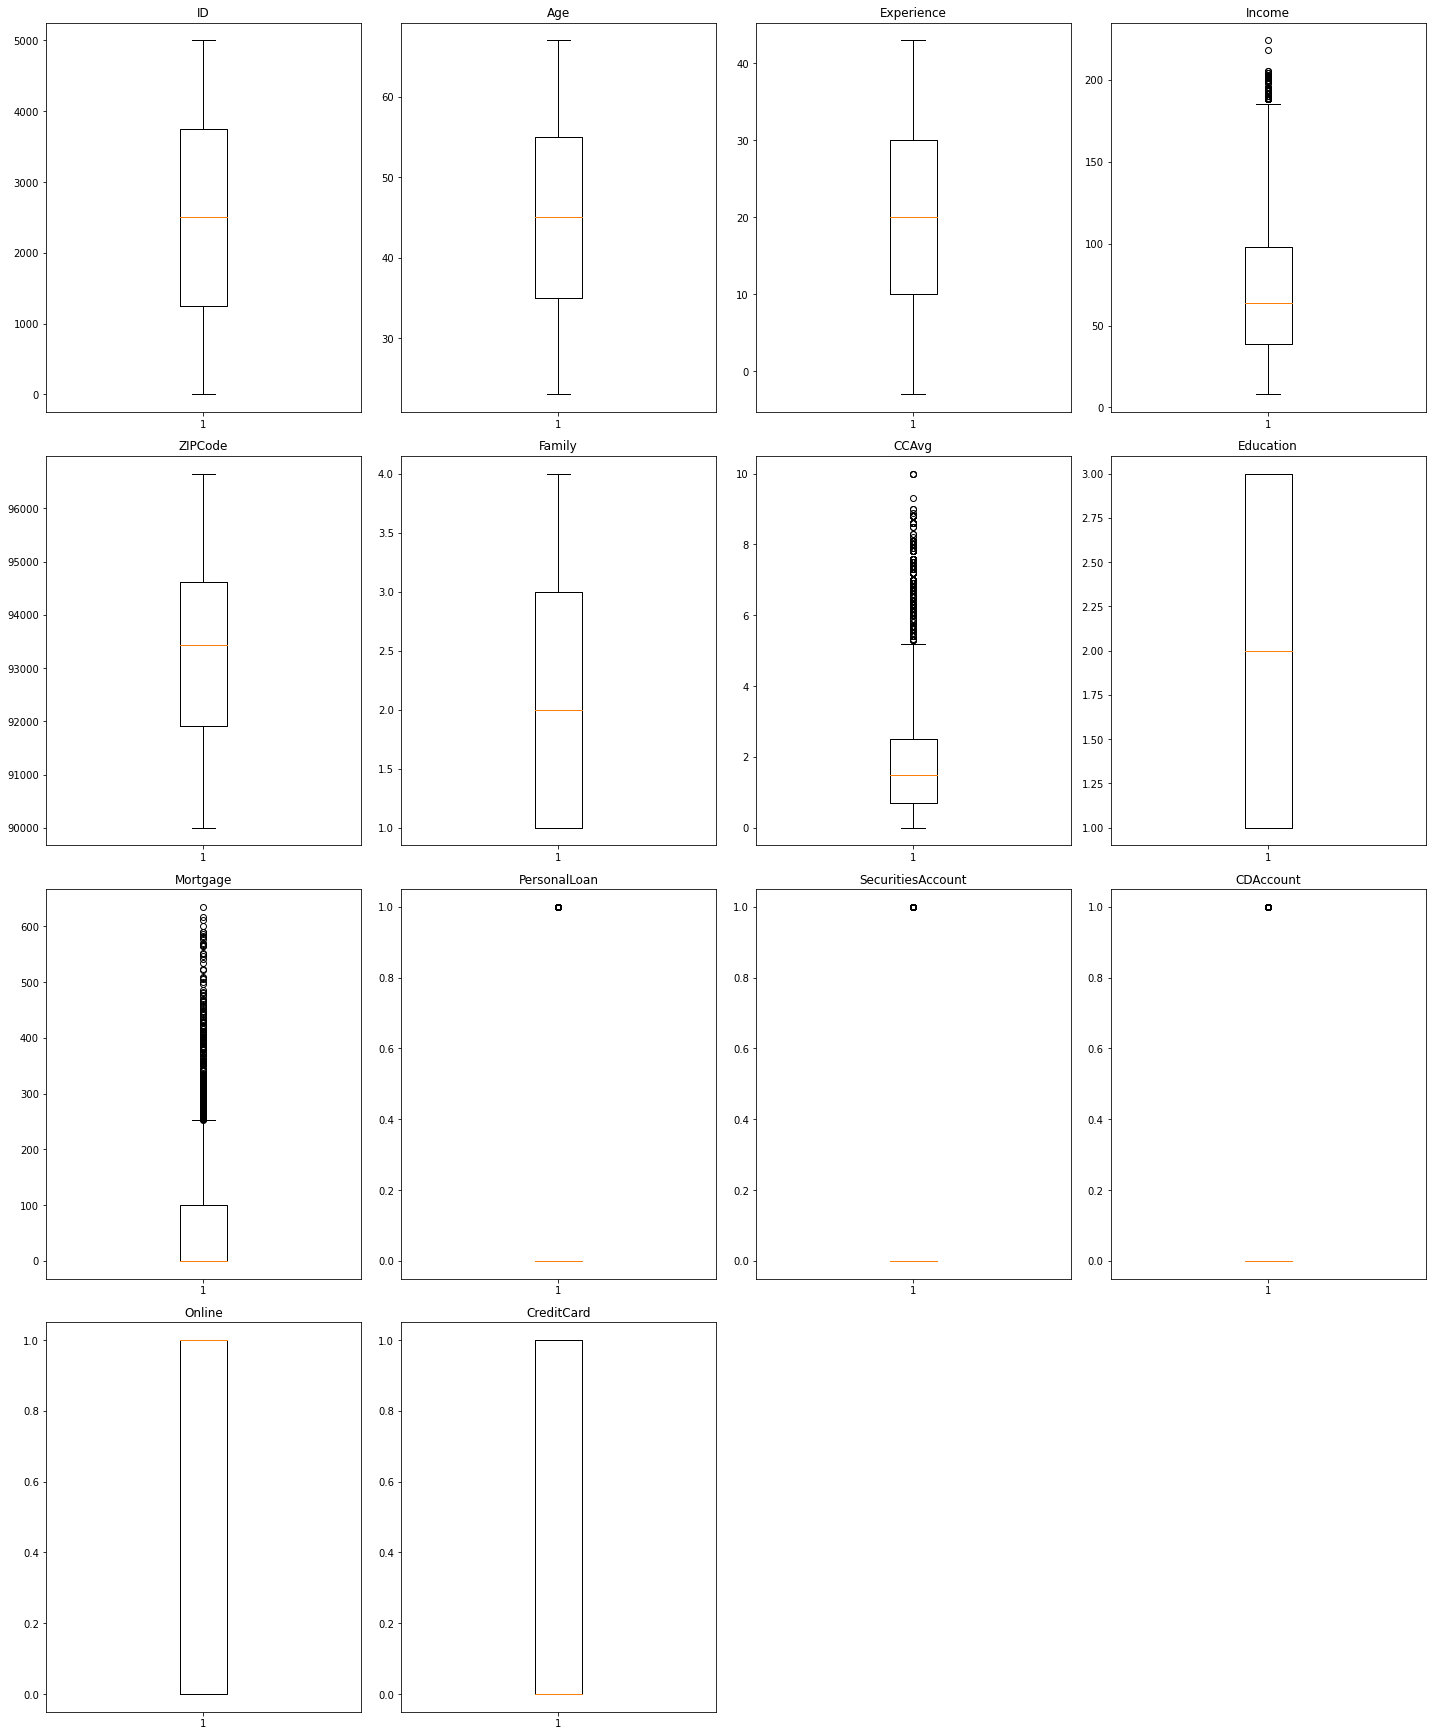

In [124]:
# outlier detection using boxplot
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

### 5.2 Treating outliers
* All the values smaller than the lower whisker will be assigned the value of the lower whisker, and all the values above the upper whisker will be assigned the value of the upper whisker.

In [125]:
def treat_outliers(data,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    data: data frame
    col: name of the column
    '''
    Q1=data[col].quantile(0.25) # 25th quantile
    Q3=data[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker) # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whisker will be assigned value of upper_Whisker 
    return data

def treat_outliers_all(data, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    data: data frame
    '''
    for c in col_list:
        data = treat_outliers(data,c)
        
    return data
    

Ignoring the binary columns from outlier treatment

In [126]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

  
# items to be removed 
not_treating= {'Online', 'CrediCard', 'CDAccount', 'SecuritiesAccount', 'PersonalLoan'} # these column have very few non zero observation , doing outlier treatment would remove those observation so we are keeping it as it is
  
numerical_col = [ele for ele in numerical_col if ele not in not_treating] 
data = treat_outliers_all(df,numerical_col)

### 5.3 Treating negative values in `Experience` column
There are 52 rows having negative values in the `Experience` column, it appears to be a data entry error. The approach I am following to impute is, first I am converting all the negative values to null value, then using group level imputer with `Age` and `Education` and taking median experience. 

In [127]:
df['Experience'] = df['Experience'].mask(df['Experience'] < 0)

In [128]:
# Impute missing Experience
df["Experience"] = df.groupby(["Age", "Education"])["Experience"].transform(
 lambda x: x.fillna(x.median()))
# remaining missing rows I am filling with 0
df['Experience'] = df['Experience'].fillna(0)

There are no decimal values in `Experience` column so, we can convert it to int from float

In [129]:
df['Experience'] = df['Experience'].astype('int')

### 5.4 Split data into train and test

In [130]:
#dropping ID column from the input
X = df.drop(['PersonalLoan','ID'], axis=1)
Y = df['PersonalLoan']

X = pd.get_dummies(X,drop_first=True)

#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1)

# 6. Building and Evaluating Model using Logistic Regression

### 6.1 Model evaluation criterion

#### Model can make wrong predictions as:
1. Predicting a liability customer will buy a personal loan but actually the customer did not buy(Type 1 Error)
2. Predicting a liability customer will not buy a personal loan but actually, the customer did buy(Type 2 Error)

#### Which case is more important? 
* Both the cases are important as cost of being wrong is high:

* If we predict a customer will buy personal loan but actually the customer did not buy then the bank has targetted the wrong customers.

* If we predict a customer will not buy personal loan but actually the customer did buy, then the bank failed to identify a potential customer which will be a big loss.

#### How to reduce this loss i.e need to reduce both False Negatives and False Positives?
*  `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

### 6.2 Create function to calculate the confusion matrix and performance metrics

In [131]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
     # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [132]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### 6.3 Logistic Regression

Accuracy on training set :  0.9077142857142857
Accuracy on test set :  0.9086666666666666
Recall on training set :  0.3323262839879154
Recall on test set :  0.3221476510067114
Precision on training set :  0.5188679245283019
Precision on test set :  0.5714285714285714
F1 on training set :  0.40515653775322286
F1 on test set :  0.41201716738197425


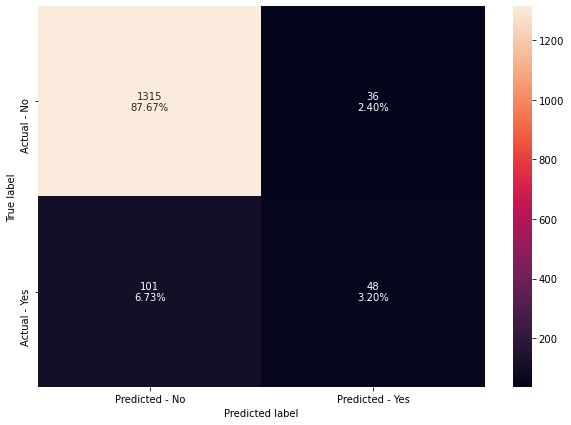

In [133]:
model = LogisticRegression(random_state=1)
lg = model.fit(X_train,y_train)

# creating confusion matrix
make_confusion_matrix(lg,y_test)

# checking model performance
scores_LR = get_metrics_score(lg,X_train,X_test,y_train,y_test,flag=True)

F1 score appears low. let's see if we can improve with different model thresholds

### 6.4 Exploratory Data Analysis on misclassified samples - Initial Logistic Regression
We need to analyze the incorrectly predicted data that is False Negative and False Positive.

In [134]:
# Getting the incorrect prediction values
y_pred = model.predict(X_test)
inc_pred = X_test[(y_test != y_pred)]
print("There are a total of", len(inc_pred), "misclassified samples with logistic regression model")

There are a total of 137 misclassified samples with logistic regression model


In [135]:
inc_pred.describe().T

count        mean        std         min         25%  \
Age               137.00000    45.29927   11.20817    26.00000    36.00000   
Experience        137.00000    20.18978   11.18332     1.00000     9.00000   
Income            137.00000   139.33212   32.06033    60.00000   115.00000   
ZIPCode           137.00000 93156.44526 1865.69438 90025.00000 91763.00000   
Family            137.00000     2.35036    1.17943     1.00000     1.00000   
CCAvg             137.00000     3.38942    1.65584     0.00000     2.20000   
Education         137.00000     1.89781    0.85993     1.00000     1.00000   
Mortgage          137.00000    69.92701  104.34703     0.00000     0.00000   
SecuritiesAccount 137.00000     0.13139    0.33906     0.00000     0.00000   
CDAccount         137.00000     0.19708    0.39925     0.00000     0.00000   
Online            137.00000     0.58394    0.49471     0.00000     0.00000   
CreditCard        137.00000     0.24088    0.42918     0.00000     0.00000   

                          50%         75%         max  
Age                  46.00000    55.00000    65.00000  
Experience           21.00000    30.00000    41.00000  
Income              139.00000   165.00000   186.50000  
ZIPCode           93407.00000 94720.00000 96003.00000  
Family                2.00000     4.00000     4.00000  
CCAvg                 3.50000     5.20000     5.20000  
Education             2.00000     3.00000     3.00000  
Mortgage              0.00000   157.00000   252.50000  
SecuritiesAccount     0.00000     0.00000     1.00000  
CDAccount             0.00000     0.00000     1.00000  
Online                1.00000     1.00000     1.00000  
CreditCard            0.00000     0.00000     1.00000

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


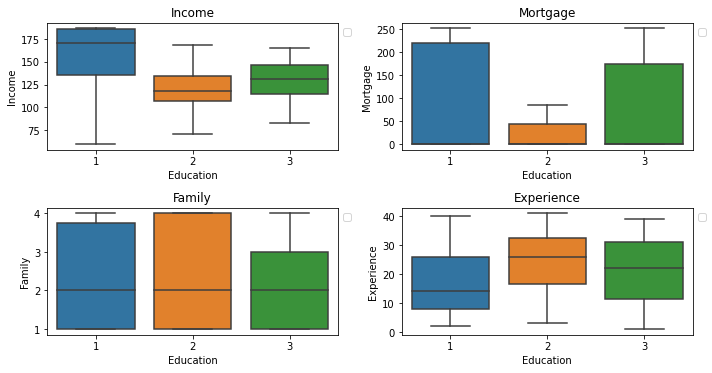

In [136]:
cols = inc_pred[['Income','Mortgage','Family', 'Experience']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(4,2,i+1)
                     sns.boxplot(inc_pred["Education"],df[variable], showfliers=False) #turning-off outliers
                     plt.tight_layout()
                     plt.legend(loc="upper left", bbox_to_anchor=(1,1))
                     plt.title(variable)
plt.show()

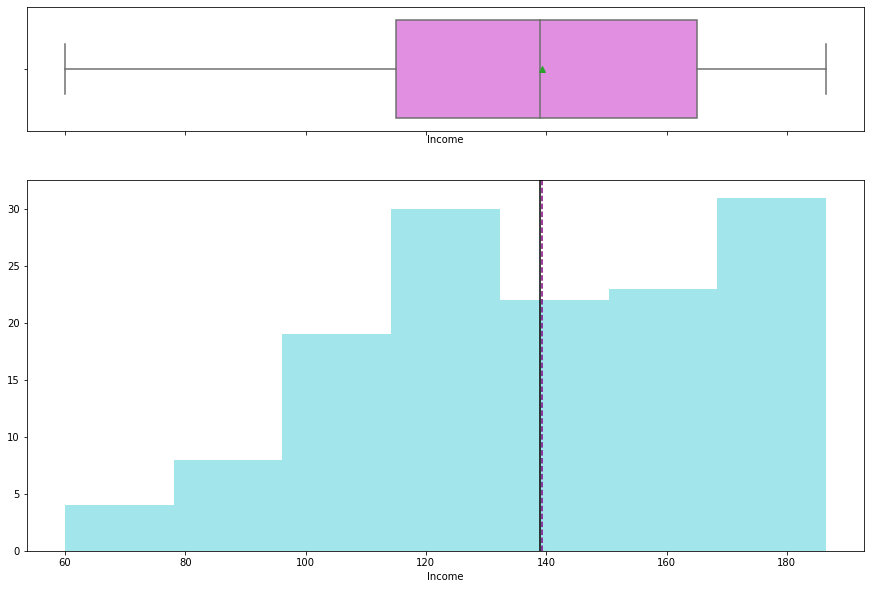

In [137]:
histogram_boxplot(inc_pred["Income"])

Observation: It appears that most of the incorrect predictions falls under higher income category which is >60K and with median income of 140K. Value of Mortage and CCAvg is also higher > 169K and > 2.02K respectively. This correlates with the higher income category.  I do not see any specific pattern with age, family, education and experience. It seems evenly distributed. 

### 6.5 ROC-AUC

ROC-AUC on training set

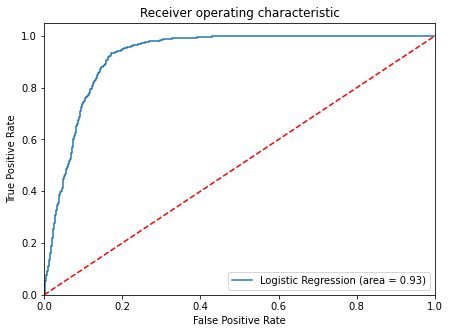

In [138]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:,1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

ROC-AUC on test set

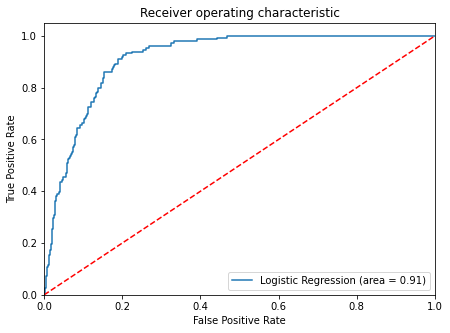

In [139]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

ROC-AUC score of 0.93 on train data and 0.91 on test data shows Logistic Regression model is giving a good performance on training and test set.

### 6.6 Coefficient interpretations

#### 6.6.1 Finding the coefficients

In [140]:
log_odds = lg.coef_[0]
pd.options.display.float_format = '{:.5f}'.format
pd.DataFrame(log_odds, X_train.columns, columns=['coef']).T

Age  Experience  Income  ZIPCode  Family   CCAvg  Education  \
coef -0.00043    -0.00044 0.03813 -0.00007 0.00021 0.00103    0.00026   

      Mortgage  SecuritiesAccount  CDAccount  Online  CreditCard  
coef   0.00114            0.00001    0.00015 0.00001     0.00001

#### 6.6.2 Coefficient interpretations

* Coefficient of Income, family, CCAvg,Education,Mortgage, securitiesaccount, CDaccount, online and creditcard are positive, increase in these will lead to increase in chances of a customer taking loan. 
* Coefficient of Age, Experience, Zipcode are negative, increase in these will lead to decrease in chances of a customer taking loan.

####  6.6.3 Converting coefficients to odds

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [141]:
odds = np.exp(lg.coef_[0]) # converting coefficients to odds
pd.set_option('display.max_columns',None)  # removing limit from number of columns to display
pd.DataFrame(odds, X_train.columns, columns=['odds']).T # adding the odds to a dataframe

Age  Experience  Income  ZIPCode  Family   CCAvg  Education  \
odds 0.99957     0.99956 1.03887  0.99993 1.00021 1.00103    1.00026   

      Mortgage  SecuritiesAccount  CDAccount  Online  CreditCard  
odds   1.00114            1.00001    1.00015 1.00001     1.00001

* Percentage change in odds

In [142]:
perc_change_odds = (np.exp(lg.coef_[0])-1)*100 # finding the percentage change
pd.set_option('display.max_columns',None) # removing limit from number of columns to display
pd.DataFrame(perc_change_odds, X_train.columns, columns=['change_odds%']).T # adding the change_odds% to a dataframe

Age  Experience  Income  ZIPCode  Family   CCAvg  Education  \
change_odds% -0.04288    -0.04357 3.88670 -0.00678 0.02062 0.10297    0.02619   

              Mortgage  SecuritiesAccount  CDAccount  Online  CreditCard  
change_odds%   0.11435            0.00107    0.01544 0.00125     0.00057

#### 6.6.4 Coefficient interpretations

* `age`: Holding all other features constant a 1 unit change in Age will decrease the odds of a customer taking loan by .99 times or a 0.04% decrease in odds of customer taking loan.
* `Experience`: Holding all other features constant a 1 unit change in Experience will decrease the odds of a customer taking loan by .99 times or a 0.04% decrease in odds of customer taking loan.
* `Income`: Holding all other features constant a 1 unit change in the Income will increase the odds of a customer taking loan by 1.03 times or a 3.88% increase in odds of customer taking loan.
* `ZIPcode`: Holding all other features constant a 1 unit change in the Zipcode will decrease the odds of a customer taking loan by 0.99 times or 0.006% decrease in odds of customer taking loan.
* `Family`: Holding all other features constant a 1 unit change in the Family will increase the odds of a cutomer taking loan by 1.0 times or 0.02% increase in a customer taking loan.
* `CCAVg`: Holding all other features constant a 1 unit change in the CCAVg will increase the odds of a cutomer taking loan by 1.0 times or 0.10% increase in a customer taking loan.
* `Education`: Holding all other features constant a 1 unit change in the Education will increase the odds of a cutomer taking loan by 1.0 times or 0.02% increase in a customer taking loan.
* `Mortgage`: Holding all other features constant a 1 unit change in the Mortgage will increase the odds of a cutomer taking loan by 1.0 times or 0.08% increase in a customer taking loan.
`SecuritiesAccount`, `CDAccount`, `Online` and `creditcard` features have a positive impact on the customer taking loan

### 6.7 Model Performance Improvement

Let's see if the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

#### 6.7.1 Optimal threshold using AUC-ROC curve

In [143]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test, lg.predict_proba(X_test)[:,1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.0688248355847818


In [144]:
# Model prediction with optimal threshold

pred_train_opt = (lg.predict_proba(X_train)[:,1]>optimal_threshold)
pred_test_opt = (lg.predict_proba(X_test)[:,1]>optimal_threshold)

train_acc = accuracy_score(y_train, pred_train_opt)
test_acc  = accuracy_score(y_test, pred_test_opt)

print('Accuracy on train data:',train_acc)
print('Accuracy on test data:',test_acc)

train_rec = recall_score(y_train, pred_train_opt)
test_rec  = recall_score(y_test, pred_test_opt)

print('Recall on train data:',train_rec)
print('Recall on test data:',test_rec)

train_prec = precision_score(y_train, pred_train_opt)
test_prec  = precision_score(y_test, pred_test_opt)

print('Precision on train data:',train_prec)
print('Precision on test data:',test_prec)

train_f1 = f1_score(y_train, pred_train_opt)
test_f1  = f1_score(y_test, pred_test_opt)

print('F1 Score on train data:',train_f1)
print('F1 Score on test data:',test_f1)

train_roc = roc_auc_score(y_train, pred_train_opt)
test_roc  = roc_auc_score(y_test, pred_test_opt)

print('ROC-AUC Score on train data:',train_roc)
print('ROC-AUC Score on test data:',test_roc)

scores_optimal = []
scores_optimal.extend((train_acc,test_acc,train_rec,test_rec,train_prec,test_prec,train_f1,test_f1))

Accuracy on train data: 0.8265714285714286
Accuracy on test data: 0.8113333333333334
Recall on train data: 0.9365558912386707
Recall on test data: 0.9194630872483222
Precision on train data: 0.34598214285714285
Precision on test data: 0.33578431372549017
F1 Score on train data: 0.5052974735126324
F1 Score on test data: 0.49192100538599637
ROC-AUC Score on train data: 0.8758197569162745
ROC-AUC Score on test data: 0.8594354666441463


* There is a big improvement in F1 score(from .40 to .51 on the train set) with optimal threshold of .77.so, compared to the default threshold of .50 there is improvement in model performance. Let's see if we can improve it further using precision-recall curve

#### 6.7.2 Let's use Precision-Recall curve and see if we can find a better threshold

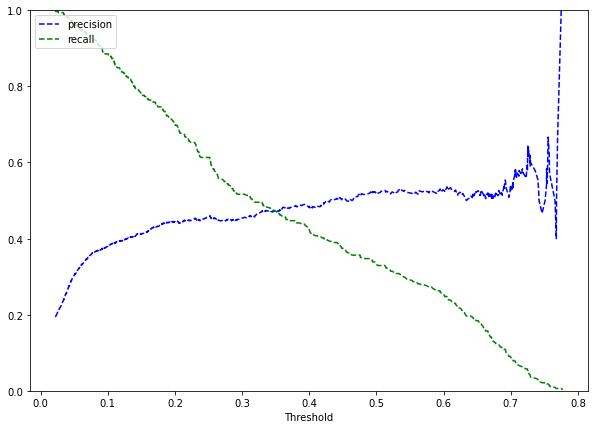

In [145]:
y_scores=lg.predict_proba(X_train)[:,1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.35, we get balanced recall and precision.

In [146]:
optimal_threshold = 0.35

# Model prediction with optimal threshold
pred_train_opt = (lg.predict_proba(X_train)[:,1]>optimal_threshold)
pred_test_opt = (lg.predict_proba(X_test)[:,1]>optimal_threshold)

#Model performance with optimal threhold

train_acc1 = accuracy_score(y_train, pred_train_opt)
test_acc1  = accuracy_score(y_test, pred_test_opt)

print('Accuracy on train data:',train_acc1)
print('Accuracy on test data:',test_acc1)

train_rec1 = recall_score(y_train, pred_train_opt)
test_rec1  = recall_score(y_test, pred_test_opt)

print('Recall on train data:',train_rec1)
print('Recall on test data:',test_rec1)

train_prec1 = precision_score(y_train, pred_train_opt)
test_prec1  = precision_score(y_test, pred_test_opt)

print('Precision on train data:',train_prec1)
print('Precision on test data:',test_prec1)

train_f1_1 = f1_score(y_train, pred_train_opt)
test_f1_1  = f1_score(y_test, pred_test_opt)

print('F1 Score on train data:',train_f1_1)
print('F1 Score on test data:',test_f1_1)

train_roc1 = roc_auc_score(y_train, pred_train_opt)
test_roc1  = roc_auc_score(y_test, pred_test_opt)

print('ROC-AUC Score on train data:',train_roc1)
print('ROC-AUC Score on test data:',test_roc1)

scores_prec_recall = []
scores_prec_recall.extend((train_acc1,test_acc1,train_rec1,test_rec1,train_prec1,test_prec1,train_f1_1,test_f1_1))

Accuracy on train data: 0.9
Accuracy on test data: 0.898
Recall on train data: 0.47129909365558914
Recall on test data: 0.4563758389261745
Precision on train data: 0.47129909365558914
Precision on test data: 0.4857142857142857
F1 Score on train data: 0.47129909365558914
F1 Score on test data: 0.4705882352941176
ROC-AUC Score on train data: 0.7080383130000887
ROC-AUC Score on test data: 0.7015409912617548


In [147]:
compare_score = pd.DataFrame({"Model": ["Initial Logistic Regression Model","Logistic Regression - Optimal threshold = 0 .68", "Logistic Regression - Optimal threshold = 0 .35"], "Train_accuracy": [.90, train_acc, train_acc1], "Test_accuracy": [.90, test_acc, test_acc1], "Train_Recall": [.33, train_rec, train_rec1], "Test_Recall": [.32, test_rec, test_rec1], "Train_Precision": [.51, train_prec, train_prec1], "Test_Precision": [.57, test_prec, test_prec1], "Train_F1": [.40, train_f1, train_f1_1], "Test_F1": [.41, test_f1, test_f1_1]})
compare_score

Model  Train_accuracy  \
0                Initial Logistic Regression Model         0.90000   
1  Logistic Regression - Optimal threshold = 0 .68         0.82657   
2  Logistic Regression - Optimal threshold = 0 .35         0.90000   

   Test_accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
0        0.90000       0.33000      0.32000          0.51000         0.57000   
1        0.81133       0.93656      0.91946          0.34598         0.33578   
2        0.89800       0.47130      0.45638          0.47130         0.48571   

   Train_F1  Test_F1  
0   0.40000  0.41000  
1   0.50530  0.49192  
2   0.47130  0.47059

### 6.8 Conclusion - Logistic regression
- We have been able to build a predictive model using logistic regression that can be used by the AllLife bank to find the customers who will take a loan with an f1_score of 0.50 on the training set and formulate marketing campaigns to target the customers accordingly.
- We found that Income, Family, CCAvg, Education, Mortgage, and age are significant predictors of customers taking loan.
-  Coefficient of Income, Family, CCAvg,Education, Mortgage, securitiesaccount, cdaccount, online, and creditcard are positive, increase in these will lead to an increase in chances of a customer taking loan. 
- Coefficient of Age, Experience, Zipcode are negative, increase in these will lead to decrease in chances of a customer taking loan.

# 7. Building & Evaluating Model using Decision Tree

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [148]:
model = DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85},random_state=1)

In [149]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [150]:
y_train.value_counts(1)

0   0.90543
1   0.09457
Name: PersonalLoan, dtype: float64

We only have 9% of positive classes, so if our model marks each sample as negative, then also we'll get 91% accuracy, hence accuracy is not a good metric to evaluate here.

### Insights:

- **True Positives:**
    - Reality: A customer did buy a loan.
    - Model predicted: The customer will buy loan.
    - Outcome: The model is good.

- **True Negatives:**
    - Reality: A customer did NOT buy loan.
    - Model predicted: The customer will NOT buy loan.
    - Outcome: The business is unaffected.

- **False Positives:**
    - Reality: A customer did NOT buy loan.
    - Model predicted: The customer will buy loan.
    - Outcome: The team which is targeting the potential customers will be wasting the resources on the customers who will not be buying loan.

- **False Negatives:**
    - Reality: A customer did buy loan.
    - Model predicted: The customer will NOT buy loan.
    - Outcome: The potential customer is missed by the sales/marketing team, the team could have offered the potential customer some discount or loyalty card to make the customer come again to buy more loan

* In this case, not being able to identify a potential customer is the biggest loss we can face.Also, targeting wrong customers lead to waste of resources and cost. Hence, F1 score is the right metric to check the performance of the model.

In [151]:
##  Function to calculate recall score
def get_f1_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("F1 score on training set : ",metrics.f1_score(y_train,pred_train))
    print("F1 score on test set : ",metrics.f1_score(y_test,pred_test))

In [152]:
get_f1_score(model)

F1 score on training set :  1.0
F1 score on test set :  0.883720930232558


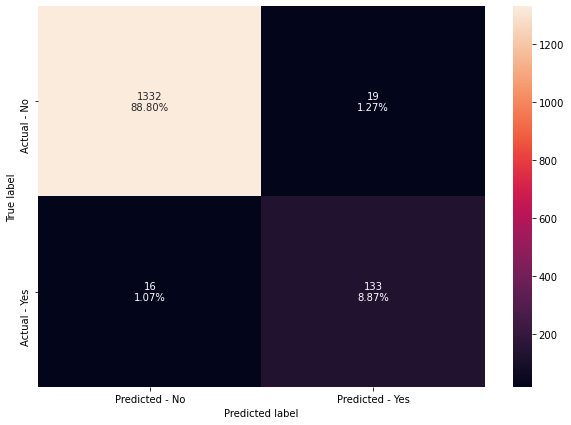

In [153]:
make_confusion_matrix(model, y_test)

* There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

### 7.1 Visualizing Decision Tree

In [154]:
feature_names = df.columns
feature_names = feature_names.drop(['PersonalLoan','ID'])
feature_names

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'SecuritiesAccount', 'CDAccount', 'Online',
       'CreditCard'],
      dtype='object')

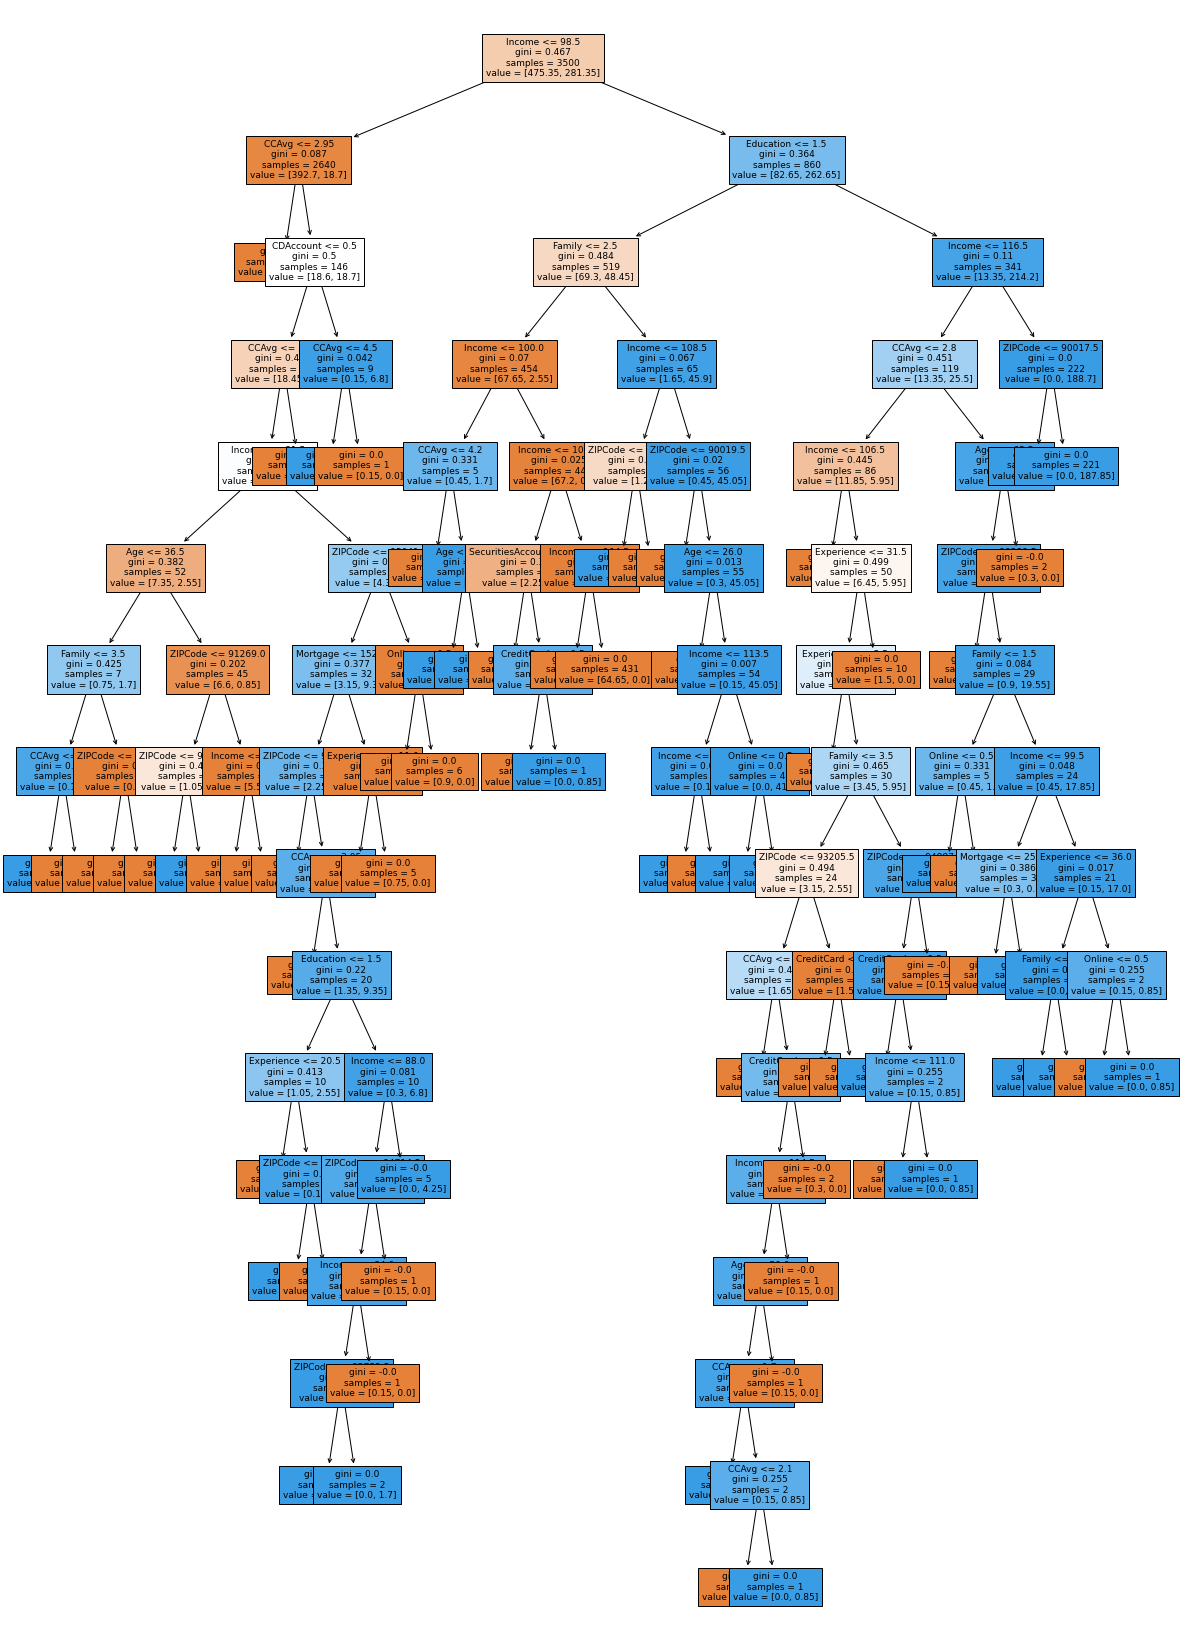

In [155]:


plt.figure(figsize=(20,30))
out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [156]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                      Imp
Income            0.59118
Family            0.14378
Education         0.12411
CCAvg             0.08314
ZIPCode           0.01980
CDAccount         0.01100
Experience        0.00868
Age               0.00655
Mortgage          0.00432
SecuritiesAccount 0.00277
Online            0.00273
CreditCard        0.00193


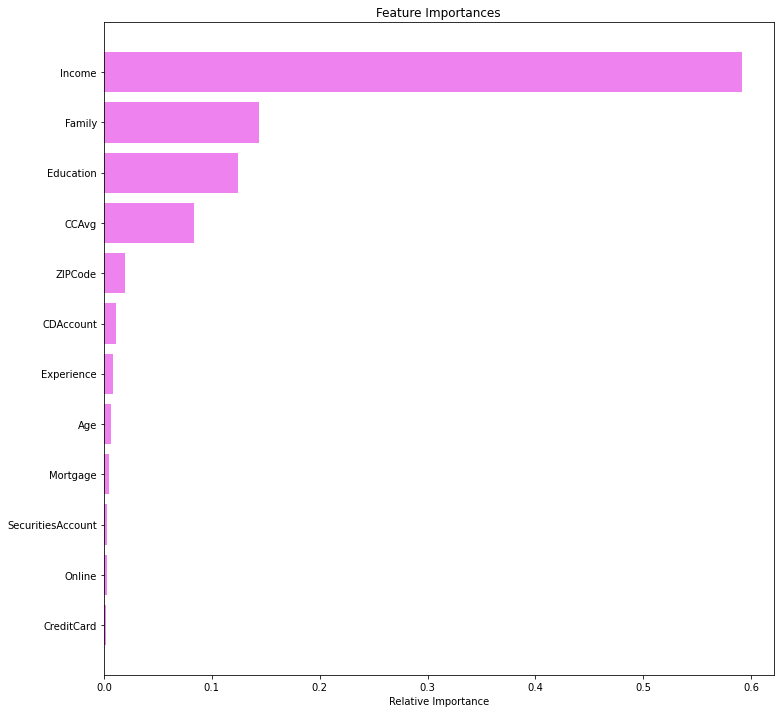

In [157]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* According to the decision tree model, Income is the most important variable for predicting if customer will buy loan. The tree above is complex and difficult to interpret.

### 7.2 Model Performance Improvement

#### 7.2.1 Reduce overfitting using GridSearch for Hyperparameter tuning of our tree model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [158]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1,class_weight = {0:.15,1:.85})

# Grid of parameters to choose from
parameters = {
            'max_depth': np.arange(1,10),
            'criterion': ['entropy','gini'],
            'splitter': ['best','random'],
            'min_impurity_decrease': [0.000001,0.00001,0.0001],
            'max_features': ['log2','sqrt']
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=4, max_features='log2',
                       min_impurity_decrease=1e-06, random_state=1)

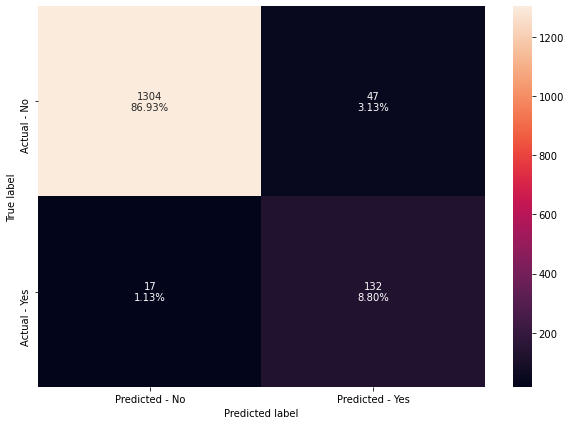

In [159]:
make_confusion_matrix(estimator, y_test)

In [160]:
get_f1_score(estimator)

F1 score on training set :  0.8293333333333333
F1 score on test set :  0.8048780487804879


**F1 score has improved for both train and test set after hyperparameter tuning and we have a generalized model.**

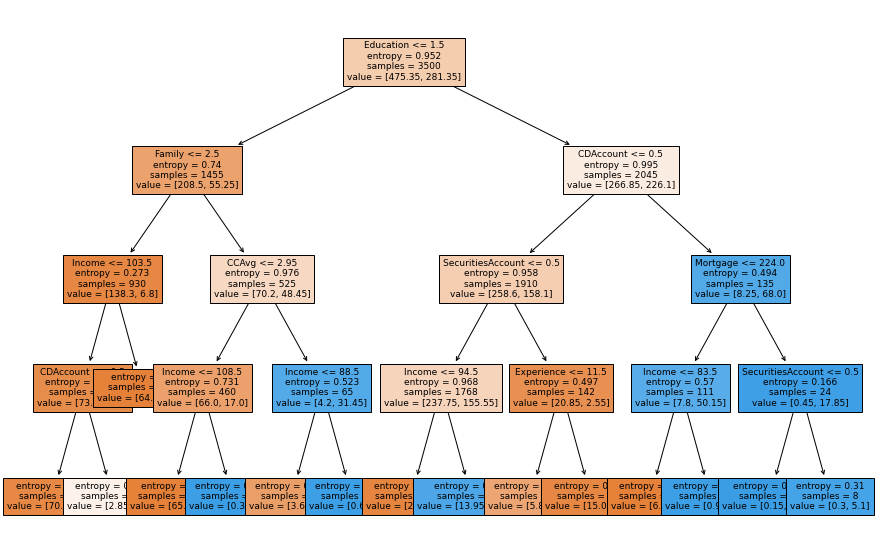

In [161]:

plt.figure(figsize=(15,10))
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [162]:
print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))


                      Imp
Income            0.67426
CDAccount         0.10643
Family            0.07275
CCAvg             0.06630
Education         0.06302
SecuritiesAccount 0.01238
Mortgage          0.00297
Experience        0.00189
Age               0.00000
ZIPCode           0.00000
Online            0.00000
CreditCard        0.00000


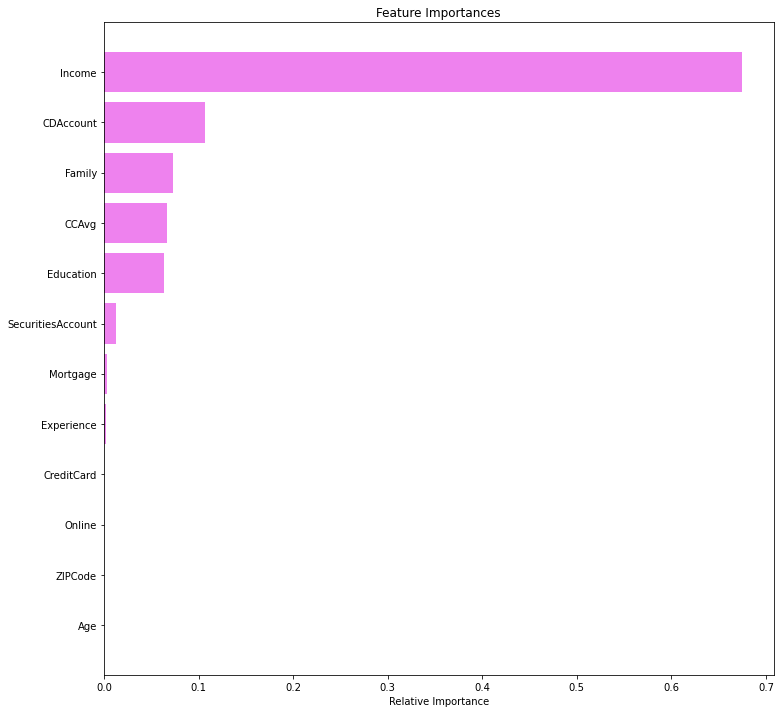

In [163]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### 7.2.2 Cost Complexity Pruning

The DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned. Here we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores.

In [164]:
clf = DecisionTreeClassifier(random_state=1,class_weight = {0:0.15,1:0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [165]:
pd.DataFrame(path)

ccp_alphas  impurities
0      0.00000    -0.00000
1      0.00000    -0.00000
2      0.00000    -0.00000
3      0.00000    -0.00000
4      0.00000    -0.00000
5      0.00000    -0.00000
6      0.00000    -0.00000
7      0.00000    -0.00000
8      0.00000    -0.00000
9      0.00000    -0.00000
10     0.00000    -0.00000
11     0.00000    -0.00000
12     0.00019     0.00037
13     0.00019     0.00075
14     0.00020     0.00115
15     0.00020     0.00154
16     0.00025     0.00230
17     0.00032     0.00294
18     0.00034     0.00328
19     0.00035     0.00362
20     0.00036     0.00399
21     0.00037     0.00436
22     0.00038     0.00513
23     0.00039     0.00552
24     0.00039     0.00630
25     0.00052     0.00682
26     0.00056     0.00794
27     0.00070     0.00934
28     0.00086     0.01192
29     0.00094     0.01286
30     0.00094     0.01474
31     0.00100     0.01673
32     0.00101     0.01774
33     0.00109     0.01883
34     0.00110     0.02102
35     0.00124     0.02475
36     0.00132     0.02606
37     0.00143     0.02750
38     0.00162     0.02911
39     0.00164     0.03075
40     0.00172     0.03247
41     0.00229     0.03476
42     0.00274     0.03750
43     0.00334     0.04084
44     0.00353     0.04436
45     0.00514     0.04950
46     0.00901     0.05851
47     0.01005     0.06857
48     0.02253     0.09110
49     0.06112     0.21334
50     0.25380     0.46714

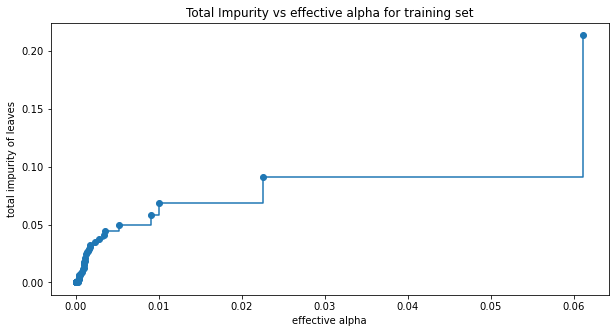

In [166]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [167]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha,class_weight = {0:0.15,1:0.85})
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2537957148948089


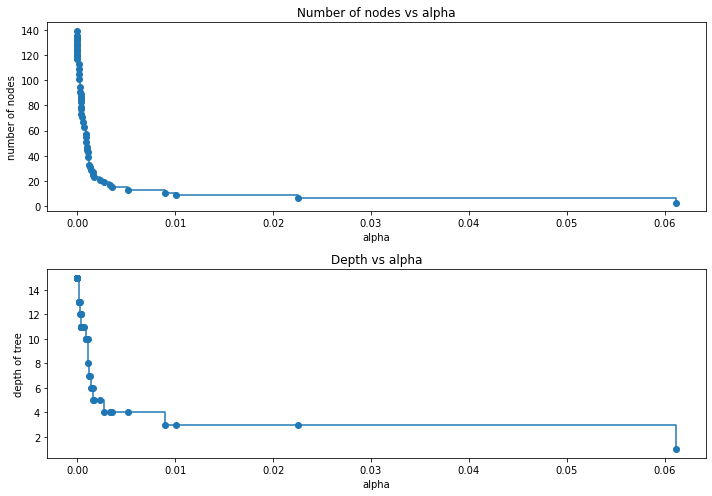

In [168]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [169]:
f1_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.f1_score(y_train,pred_train3)
    f1_train.append(values_train)

In [170]:
f1_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.f1_score(y_test,pred_test3)
    f1_test.append(values_test)

In [171]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

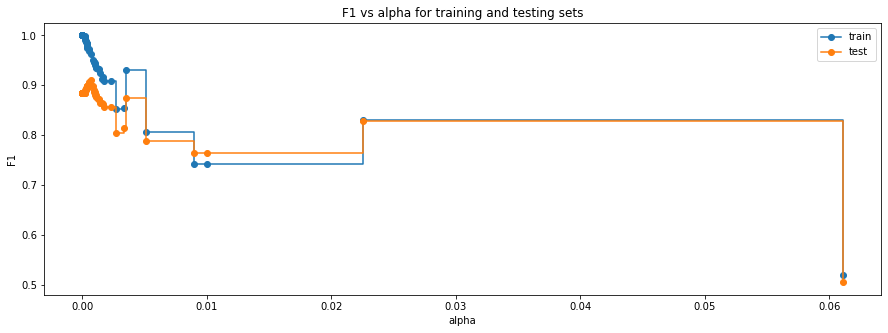

In [172]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1")
ax.set_title("F1 vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker='o', label="train",
        drawstyle="steps-post",)
ax.plot(ccp_alphas, f1_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [173]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0007040048115645474,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


In [174]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0007040048115645474,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

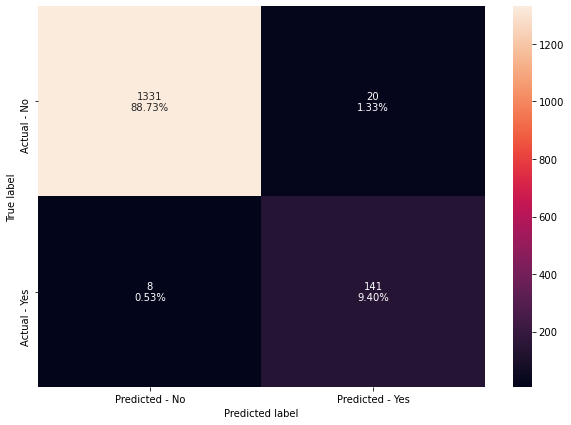

In [175]:
make_confusion_matrix(best_model,y_test)

In [176]:
get_f1_score(best_model)

F1 score on training set :  0.9622093023255814
F1 score on test set :  0.9096774193548388


In [177]:
y_test[1] 

0

### 7.3 Exploratory Data Analysis on misclassified samples - Decision Tree with cost complexity pruning
We need to analyze the incorrectly predicted data that is False Negative and False Positive.

In [178]:
# Getting the incorrect prediction values
y_pred = best_model.predict(X_test)
inc_pred1 = X_test[(y_test != y_pred)]
print("There are a total of", len(inc_pred1), "misclassified samples with decision tree with post-pruning")

There are a total of 28 misclassified samples with decision tree with post-pruning


In [179]:
inc_pred1.describe().T

count        mean        std         min         25%  \
Age               28.00000    44.00000   10.95107    27.00000    35.00000   
Experience        28.00000    18.82143   10.91738     3.00000     9.00000   
Income            28.00000   102.28571   12.77688    64.00000    98.50000   
ZIPCode           28.00000 93167.89286 1847.66835 90064.00000 92113.25000   
Family            28.00000     2.39286    0.99403     1.00000     2.00000   
CCAvg             28.00000     2.88929    1.48532     0.50000     1.17500   
Education         28.00000     2.10714    0.91649     1.00000     1.00000   
Mortgage          28.00000    38.80357   79.92639     0.00000     0.00000   
SecuritiesAccount 28.00000     0.28571    0.46004     0.00000     0.00000   
CDAccount         28.00000     0.10714    0.31497     0.00000     0.00000   
Online            28.00000     0.60714    0.49735     0.00000     0.00000   
CreditCard        28.00000     0.21429    0.41786     0.00000     0.00000   

                          50%         75%         max  
Age                  43.00000    52.25000    64.00000  
Experience           17.50000    27.00000    39.00000  
Income              108.00000   111.00000   115.00000  
ZIPCode           93524.50000 94832.75000 95403.00000  
Family                2.00000     3.00000     4.00000  
CCAvg                 3.40000     4.15000     5.20000  
Education             2.00000     3.00000     3.00000  
Mortgage              0.00000     0.00000   252.50000  
SecuritiesAccount     0.00000     1.00000     1.00000  
CDAccount             0.00000     0.00000     1.00000  
Online                1.00000     1.00000     1.00000  
CreditCard            0.00000     0.00000     1.00000

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


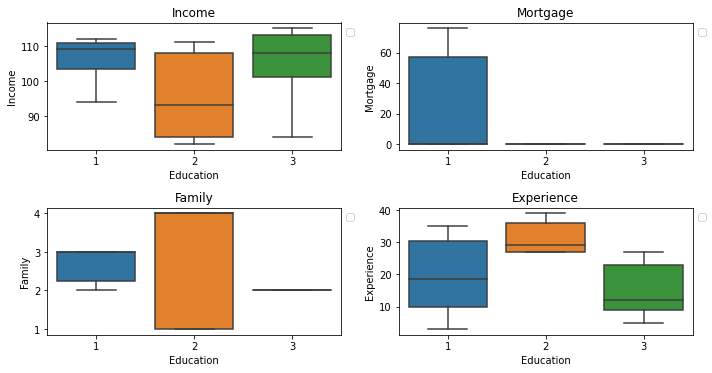

In [180]:
cols = inc_pred1[['Income','Mortgage','Family', 'Experience']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(4,2,i+1)
                     sns.boxplot(inc_pred1["Education"],df[variable], showfliers=False) #turning-off outliers
                     plt.tight_layout()
                     plt.legend(loc="upper left", bbox_to_anchor=(1,1))
                     plt.title(variable)
plt.show()

In [181]:
inc_pred1[inc_pred1["Income"]== 64]

Age  Experience   Income  ZIPCode  Family   CCAvg  Education  Mortgage  \
1518   43          17 64.00000    95053       4 3.00000          3 221.00000   

      SecuritiesAccount  CDAccount  Online  CreditCard  
1518                  0          0       1           0

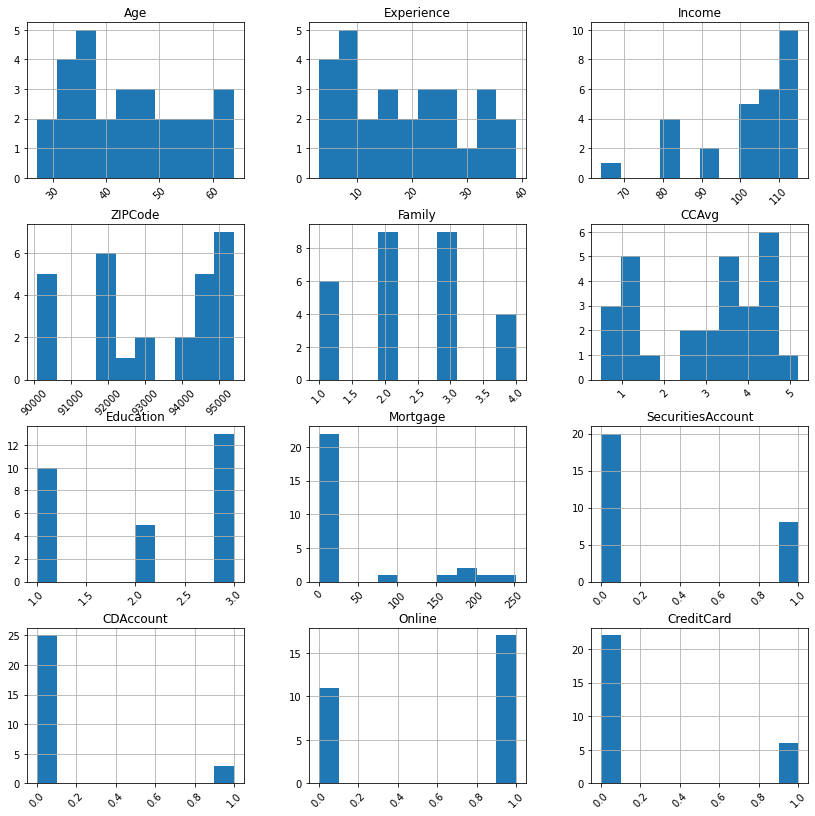

In [182]:
inc_pred1.hist(figsize=(14,14), xrot=45)
plt.show()

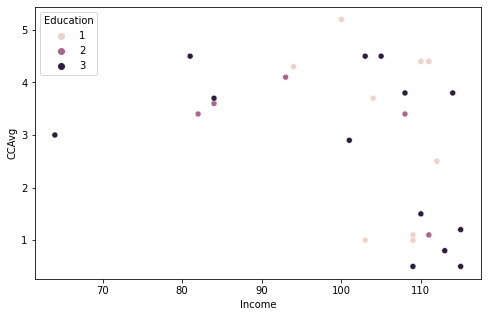

In [183]:
plt.figure(figsize=(8,5))
sns.scatterplot(y='CCAvg', x='Income', hue = 'Education', data=inc_pred1);

Observation: It appears that most of the incorrect predictions falls under higher income category - 75% of the misclassified samples falls between 97k and 115K and with median income of 108K. However, there is also one sample of salary = 64K. So cannot confirm a specific pattern. Value of Mortage and CCAvg is also higher > 169K and > 2.02K respectively. This correlates with the higher income category.  I do not see any specific pattern with age, family, education and experience. It seems evenly distributed

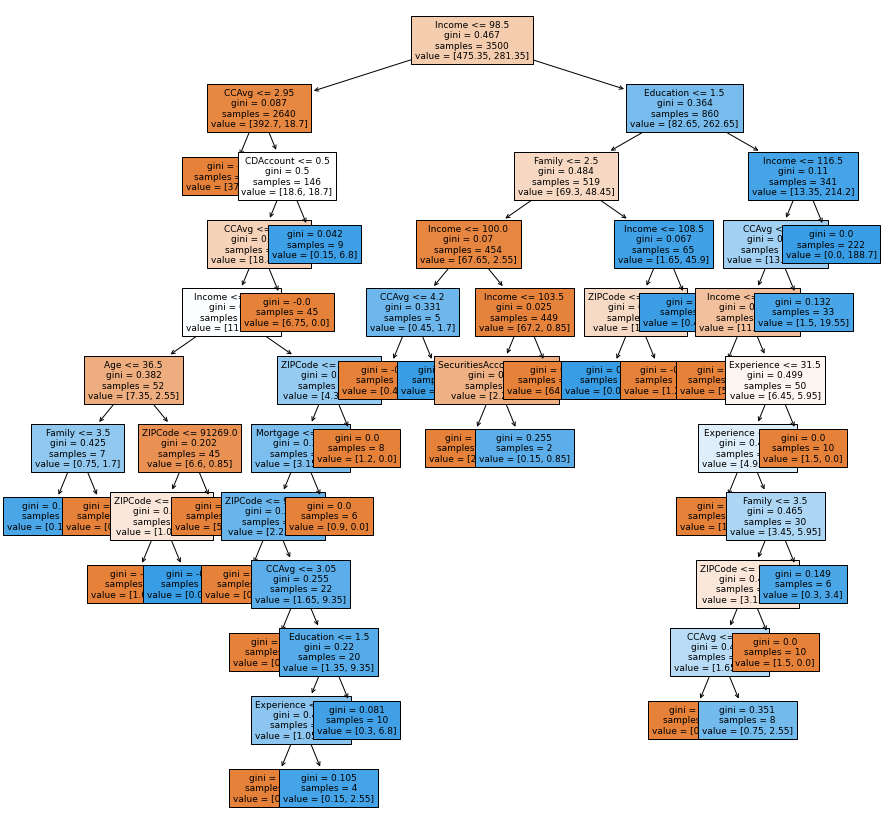

In [184]:
plt.figure(figsize=(15,15))

out = tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [185]:
print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))


                      Imp
Income            0.59967
Family            0.14633
Education         0.12664
CCAvg             0.08238
ZIPCode           0.01548
CDAccount         0.01122
Experience        0.00874
Age               0.00358
Mortgage          0.00313
SecuritiesAccount 0.00283
Online            0.00000
CreditCard        0.00000


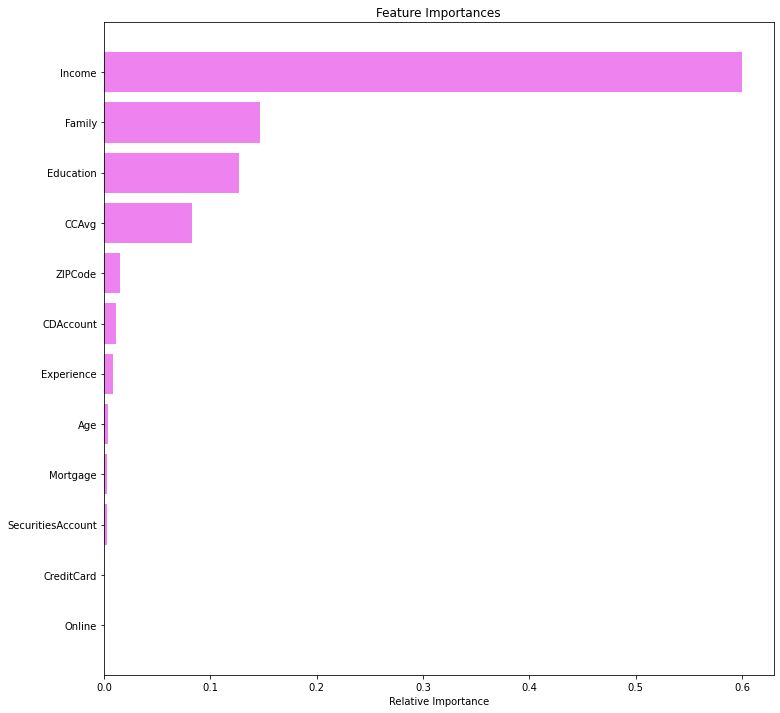

In [186]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indi ces], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [187]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision treee with hyperparameter tuning',
                                          'Decision tree with post-pruning'], 'Train_F1':[1,0.82,0.96], 'Test_F1':[0.88,0.80,0.90]}) 
comparison_frame

Model  Train_F1  Test_F1
0                Initial decision tree model   1.00000  0.88000
1  Decision treee with hyperparameter tuning   0.82000  0.80000
2            Decision tree with post-pruning   0.96000  0.90000

**Decision tree model with post pruning has given the best F1 score on data.**

### 7.4 Conclusions - Decision Tree
- We analyzed the "LoanModelling" using different techniques and used Decision Tree Classifier to build a predictive model for the same.
- The model built can be used to predict if a customer is going to buy a loan or not.
- We visualized different trees and their confusion matrix to get a better understanding of the model. Easy interpretation is one of the key benefits of Decision Trees.
- Income, Family, Education and CCAvg are the most important variable in predicting if a customer will buy a loan. 
- We established the importance of hyper-parameters/ pruning to reduce overfitting.

## 8. Insights & Recommendations

In [188]:
print("*"* 100)
print("*** Comparison of F1 score with different models(both decision tree and logistic regression) ***")
print("*"* 100)
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision treee with hyperparameter tuning',
                                          'Decision tree with post-pruning', "Initial Logistic Regression Model","Logistic Regression - Optimal threshold = 0 .77", "Logistic Regression - Optimal threshold = 0 .35"], 'Train_F1':[1,0.82,0.96, .40, train_f1, train_f1_1], 'Test_F1':[0.88,0.80,0.90,.41, test_f1, test_f1_1]}) 
comparison_frame

****************************************************************************************************
*** Comparison of F1 score with different models(both decision tree and logistic regression) ***
****************************************************************************************************


Model  Train_F1  Test_F1
0                      Initial decision tree model   1.00000  0.88000
1        Decision treee with hyperparameter tuning   0.82000  0.80000
2                  Decision tree with post-pruning   0.96000  0.90000
3                Initial Logistic Regression Model   0.40000  0.41000
4  Logistic Regression - Optimal threshold = 0 .77   0.50530  0.49192
5  Logistic Regression - Optimal threshold = 0 .35   0.47130  0.47059

* Two classification algorithms(logistic regression, decision tree) with three different optimizations each were used in the study. From the above comparison table, it seems that decision tree with post-pruning is giving the highest F1 score even though we got F1 score as 1 with initial decision tree model but that model was n't generalized one.We can use decision tree with post-pruning as our model. Moreover, the train and test scores are much closer.

* According to the decision tree model:

     * Income, Family, Education and CCAvg (in that order) are the most important variables in determining if a customer will   
     buy a loan

    a) If a customer has an annual income < 98.5K and CCAvg <=2.95 then the customer is less likely to take a loan

    b) If a customer has an annual income > 98.5 and >=2.95 CCAVg with CDaccount  >= 0.5 then the customer is more likely to 
    take a loan 
    
* It is observed that family size greater than 2.5 and education level greater than 1.5 are more likely to take loan

* Also, it is observerd that customer who are aged over 36.5 are more likely be the customer who can be targeted for the loan as the likelhood of them taking a loan is high

* The bank has to devise a targetted marketing campaign keeping the above predictions in mind to attract more business.Other strategies include as follows:

    1. Offer exceptional customer service to retain the existing customers so that they don't end up going to the competitors

    2. Introduce custom loan products that caters to the individual customer needs

    3. Establish partnerships and nurture relationships by offering free newsletter with helpful advice and tips. By doing 
    this, the bank can build an email list to build relationships. 

    4. Increase marketing spending and devise targetted marketing campaign to attract more customers for loan 

    5. Follow Up with existing customers and gain referrals to expand the customer base.